In [1]:
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import glob

In [2]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
from mpl_finance import candlestick_ohlc
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
%matplotlib inline

###### Question 1. Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

Loaded all the stock tickers with ticker symbols as variable names using for loop, excluding the all stocks files. The all stocks files are loaded separately into variables all1 and all2 respectively.

In [202]:
path = r'C:\Users\Priyanka\Documents\python-cave\midterm\stock-time-series'                    
all_files = glob.glob(os.path.join(path, "*.csv")) 
for i in all_files:
    if  os.path.basename(i).find('all')==-1:
        globals()[os.path.basename(i).split('_')[0]]=pd.read_csv(i,parse_dates = True, index_col = 0)

In [203]:
all1=pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv',parse_dates = True, index_col = 0)
all2=pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv',parse_dates = True, index_col = 0)

###### Question 2. Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.


For performing initial investigations, the head method has been used to take a closer look at the data. Shape method has been used to check the number of rows and columns in the data and info method has been used to get the datatype of columns in the datasets. Next the describe function has been used to check the summary statistics of the data which includes count, mean, standard deviation, minimum and maximum values and the quantiles of the complete dataset. The output of the describe method shows that the mean value is greater than median for all the columns for the dataset containing all stocks and there is a large difference between 75% and max values for all the columns. This shows there are outliers in the data. After this, null values and where they are in the dataset is explored. Two bad dates are found and dropped. Next the correlation among the closing prices of stocks of different companies are checked. Heatmap is used to visualize the correlation matrix. Darker the green color in the heatmap, stronger is the positive correlation and alternately higher intensity of red color indicates stronger negative correlation. The companies from same sector seems to have stronger positive correlation than those from different sectors. For example, Merck & Co Inc(MRK), Johnson & Johnson(JNJ) and Procter & Gamble Co(PG) are from same sector and they shows strong correlation. Strongly correlated stocks are used in pair trading and these companies could be selected as pairs for trading. Also, relationship among the different variables (Open, High, Low, Close, Volume) in the datasets is checked to find out the correlation between closing price and all other features. Heatmap is used to visualize the feature correlation matrix. Scatter plot is also used to visualize the relation among the features. The closing price for different time periods of the stocks of different companies are plotted to understand the stock history of the companies. 

The following are the insights from the EDA analysis:
In the early years that is 2006, 2007, 2008 the volume of trade in the market was very high compared to recent years that is 2017 and 2016. Google has the highest mean closing price over the different time periods as well as for the years 2015 and 2016, followed by Amazon. However, for the latest year 2017 the mean closing price for Amazon is higher than that of Google. The mean trade volume for GE is highest in 2017 while that of Apple is highest in 2016. Again for 2015 trade volume of GE is highest and for 2014 the mean trade volume is highest for Apple. Google has the highest closing price for the years 2015,2014,2013 closely followed by Amazon while in the years 2017 and 2016 Amazon has the highest closing price for the year 2017 and 2016 beating Google. Candlestick plot has been used to visualize the behavior of the stocks data year wise for the years 2017,2016,2015 as well as for the months of January, June and December for the year 2017. A green candlestick indicates a day/month/year where the closing price was higher than the open (a gain), while a red candlestick indicates a day/month/year where the open was higher than the close (a loss). The wicks indicate the high and the low, and the body the open and close (hue is used to determine which end of the body is the open and which the close).


In [6]:
all1.head()

Open   High    Low  Close   Volume Name
Date                                                
2006-01-03  77.76  79.35  77.24  79.11  3117200  MMM
2006-01-04  79.49  79.49  78.25  78.71  2558000  MMM
2006-01-05  78.41  78.65  77.56  77.99  2529500  MMM
2006-01-06  78.64  78.90  77.64  78.63  2479500  MMM
2006-01-09  78.50  79.83  78.46  79.02  1845600  MMM

In [7]:
all1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [8]:
all1['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [9]:
all2.head()

Open    High     Low   Close   Volume Name
Date                                                    
2017-01-03  178.83  180.00  177.22  178.05  2510055  MMM
2017-01-04  178.03  178.90  177.61  178.32  1541985  MMM
2017-01-05  178.26  179.14  176.89  177.71  1447848  MMM
2017-01-06  177.29  178.60  175.80  178.23  1625049  MMM
2017-01-09  178.37  178.38  177.20  177.27  1622625  MMM

In [133]:
all2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7781 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      7757 non-null float64
High      7772 non-null float64
Low       7762 non-null float64
Close     7781 non-null float64
Volume    7781 non-null int64
Name      7781 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 425.5+ KB


In [10]:
all1.describe()

Open          High           Low         Close        Volume
count  93587.000000  93602.000000  93592.000000  93612.000000  9.361200e+04
mean      85.623260     86.387045     84.836664     85.641753  2.015667e+07
std      108.151723    108.956365    107.225361    108.121106  3.442108e+07
min        6.750000      7.170000      0.000000      6.660000  0.000000e+00
25%       33.950000     34.290000     33.600000     33.960000  5.040180e+06
50%       60.040000     60.630000     59.490000     60.050000  9.701142e+06
75%       94.000000     94.740000     93.250000     94.012500  2.075222e+07
max     1204.880000   1213.410000   1191.150000   1195.830000  8.432640e+08

In [11]:
all2.describe()

Open         High          Low        Close        Volume
count  7757.000000  7772.000000  7762.000000  7781.000000  7.781000e+03
mean    160.105484   161.006810   159.015224   159.996171  1.023779e+07
std     217.530884   218.727637   215.859901   217.242145  1.283528e+07
min      17.270000    17.400000    17.250000    17.360000  8.708300e+04
25%      60.430000    61.007500    59.977500    60.420000  3.132760e+06
50%     102.000000   102.835000   101.330000   102.200000  6.083340e+06
75%     154.700000   155.452500   153.775000   154.750000  1.336894e+07
max    1204.880000  1213.410000  1191.150000  1195.830000  3.125568e+08

In [12]:
all1.reset_index().isna().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [13]:
all1.reset_index().loc[all1.reset_index().isnull().sum(axis = 1).astype(bool)].nunique()

Date       2
Open       0
High      15
Low        5
Close     25
Volume    25
Name      24
dtype: int64

In [14]:
dates = all1.reset_index().loc[all1.reset_index().isnull().sum(axis = 1).astype(bool)]['Date'].unique()
all1.reset_index().drop(np.arange(len(all1.reset_index()))[all1.reset_index()['Date'].isin(dates)], inplace = True)
all1.reset_index().isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [15]:
dates = all2.reset_index().loc[all2.reset_index().isnull().sum(axis = 1).astype(bool)]['Date'].unique()
all2.reset_index().drop(np.arange(len(all2.reset_index()))[all2.reset_index()['Date'].isin(dates)], inplace = True)
all2.reset_index().isnull().sum()

Date       0
Open      24
High       9
Low       19
Close      0
Volume     0
Name       0
dtype: int64

In [34]:
all1.shape

(93612, 6)

In [35]:
all2.shape

(7781, 6)

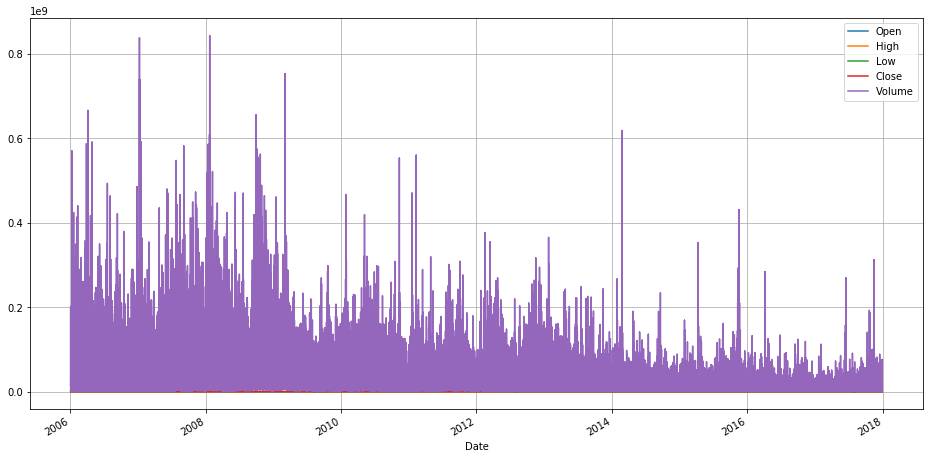

In [36]:
all1.plot(figsize=(16,8),grid=True)

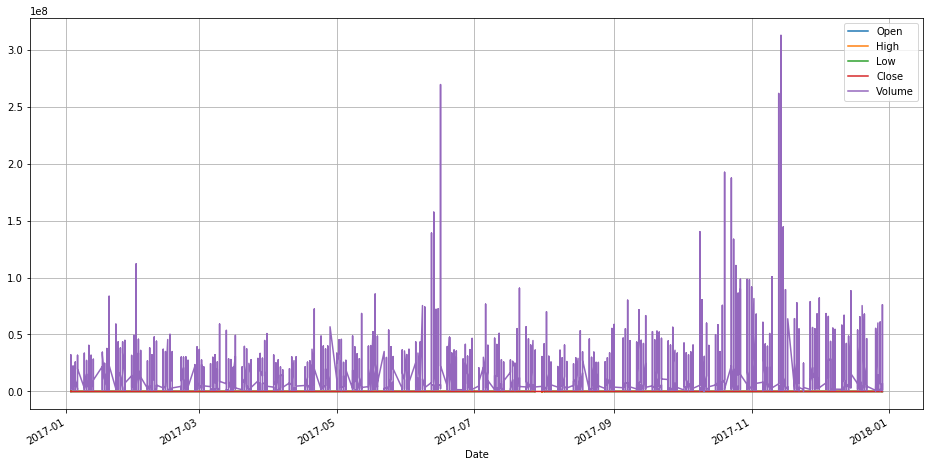

In [194]:
all2.plot(figsize=(16,8),grid=True)

In [16]:
def plot_corr_heatmap(df_corr):
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(16, 8))
    colormap = sns.diverging_palette(10, 140, as_cmap=True)
    sns.heatmap(df_corr, mask=mask, cmap=colormap, vmax=1.0,vmin=-0.4,
                square=True, 
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [17]:
stock=pd.DataFrame()
stock['MMM']    =	MMM ['Close']
stock['AXP'] 	=	AXP ['Close']
stock['AAPL'] 	=	AAPL ['Close']
stock['BA'] 	=	BA ['Close']
stock['CAT'] 	=	CAT ['Close']
stock['CVX'] 	=	CVX ['Close']
stock['CSCO'] 	=	CSCO ['Close']
stock['KO'] 	=	KO ['Close']
stock['DIS']	=	DIS['Close']
stock['XOM'] 	=	XOM ['Close']
stock['GE'] 	=	GE ['Close']
stock['GS'] 	=	GS ['Close']
stock['HD'] 	=	HD ['Close']
stock['IBM'] 	=	IBM ['Close']
stock['INTC'] 	=	INTC ['Close']
stock['JNJ'] 	=	JNJ ['Close']
stock['JPM'] 	=	JPM ['Close']
stock['MCD'] 	=	MCD ['Close']
stock['MRK']   	=	MRK   ['Close']
stock['MSFT'] 	=	MSFT ['Close']
stock['NKE'] 	=	NKE ['Close']
stock['PFE'] 	=	PFE ['Close']
stock['PG'] 	=	PG ['Close']
stock['TRV'] 	=	TRV ['Close']
stock['UTX'] 	=	UTX ['Close']
stock['UNH'] 	=	UNH ['Close']
stock['VZ'] 	=	VZ ['Close']
stock['WMT'] 	=	WMT ['Close']
stock['GOOGL'] 	=	GOOGL ['Close']
stock['AMZN'] 	=	AMZN ['Close']
stock['AABA']	=	AABA['Close']

stock.corr()

MMM       AXP      AAPL        BA       CAT       CVX      CSCO  \
MMM    1.000000  0.805692  0.923625  0.940475  0.616621  0.598571  0.732300   
AXP    0.805692  1.000000  0.748650  0.827328  0.717464  0.709132  0.590147   
AAPL   0.923625  0.748650  1.000000  0.837756  0.654870  0.690248  0.539599   
BA     0.940475  0.827328  0.837756  1.000000  0.646798  0.532325  0.773693   
CAT    0.616621  0.717464  0.654870  0.646798  1.000000  0.765916  0.316608   
CVX    0.598571  0.709132  0.690248  0.532325  0.765916  1.000000  0.242389   
CSCO   0.732300  0.590147  0.539599  0.773693  0.316608  0.242389  1.000000   
KO     0.859056  0.767608  0.921092  0.738723  0.672637  0.828239  0.462738   
DIS    0.947229  0.805052  0.924424  0.850163  0.517362  0.605407  0.645550   
XOM    0.439525  0.607971  0.468828  0.384287  0.535009  0.847704  0.261598   
GE     0.211007  0.393894 -0.018022  0.308589  0.106844 -0.021964  0.516797   
GS     0.580182  0.569854  0.377683  0.685385  0.332728  0.168284  0.850535   
HD     0.974688  0.761646  0.923425  0.908242  0.531849  0.547237  0.690027   
IBM    0.413058  0.525126  0.619814  0.283928  0.657312  0.879690 -0.008184   
INTC   0.924588  0.785474  0.887671  0.875472  0.654887  0.596239  0.742262   
JNJ    0.980327  0.790645  0.896103  0.917758  0.562178  0.609627  0.717627   
JPM    0.935109  0.771199  0.815342  0.951968  0.583004  0.480891  0.810230   
MCD    0.878985  0.641561  0.930882  0.796220  0.658567  0.719027  0.486700   
MRK    0.854873  0.855366  0.753470  0.831806  0.533900  0.583563  0.785996   
MSFT   0.959821  0.722155  0.874883  0.940083  0.566436  0.492523  0.786750   
NKE    0.932113  0.722754  0.927291  0.816875  0.489615  0.581139  0.601889   
PFE    0.859894  0.882687  0.757467  0.844354  0.527264  0.542955  0.669748   
PG     0.911150  0.840511  0.847918  0.846567  0.621302  0.738697  0.683231   
TRV    0.976248  0.797562  0.937581  0.885621  0.571050  0.645493  0.667945   
UTX    0.906165  0.897422  0.878948  0.839093  0.730492  0.805705  0.591940   
UNH    0.964486  0.732358  0.887869  0.943149  0.567890  0.481423  0.735390   
VZ     0.793122  0.830338  0.763086  0.723405  0.578496  0.777164  0.551003   
WMT    0.791420  0.768143  0.852629  0.713072  0.619460  0.814947  0.390964   
GOOGL  0.972713  0.743919  0.912855  0.913277  0.560884  0.578739  0.711830   
AMZN   0.942229  0.639960  0.903156  0.882952  0.551292  0.529430  0.655842   
AABA   0.879712  0.807649  0.719988  0.934632  0.537087  0.412311  0.763989   

             KO       DIS       XOM    ...          PFE        PG       TRV  \
MMM    0.859056  0.947229  0.439525    ...     0.859894  0.911150  0.976248   
AXP    0.767608  0.805052  0.607971    ...     0.882687  0.840511  0.797562   
AAPL   0.921092  0.924424  0.468828    ...     0.757467  0.847918  0.937581   
BA     0.738723  0.850163  0.384287    ...     0.844354  0.846567  0.885621   
CAT    0.672637  0.517362  0.535009    ...     0.527264  0.621302  0.571050   
CVX    0.828239  0.605407  0.847704    ...     0.542955  0.738697  0.645493   
CSCO   0.462738  0.645550  0.261598    ...     0.669748  0.683231  0.667945   
KO     1.000000  0.883560  0.659233    ...     0.755290  0.883519  0.910617   
DIS    0.883560  1.000000  0.488706    ...     0.877462  0.891107  0.973372   
XOM    0.659233  0.488706  1.000000    ...     0.519884  0.639293  0.496436   
GE     0.037558  0.207313  0.253440    ...     0.520544  0.292621  0.177924   
GS     0.296615  0.501543  0.195189    ...     0.565250  0.525344  0.503754   
HD     0.853276  0.957500  0.393349    ...     0.877678  0.879063  0.981708   
IBM    0.755748  0.480454  0.649478    ...     0.353017  0.523645  0.499081   
INTC   0.825372  0.880119  0.477773    ...     0.799481  0.861476  0.900643   
JNJ    0.853726  0.935950  0.476067    ...     0.859866  0.931338  0.969596   
JPM    0.709115  0.855274  0.332923    ...     0.824498  0.835945  0.890541   
MCD    0.915010  0.832560  0.459970    ...     0.654311  0.81

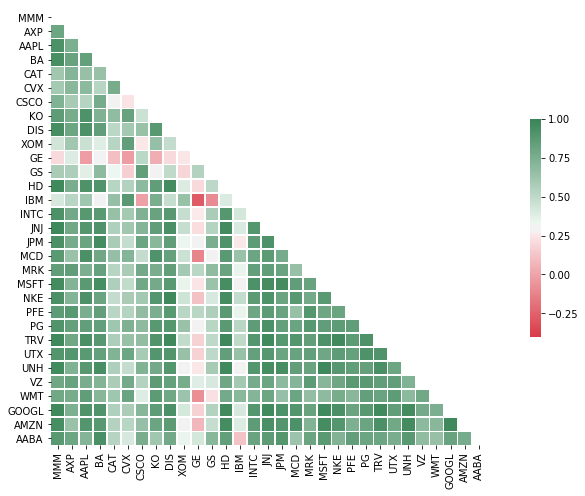

In [135]:
plot_corr_heatmap(stock.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021116FA48D0>,
      dtype=object)

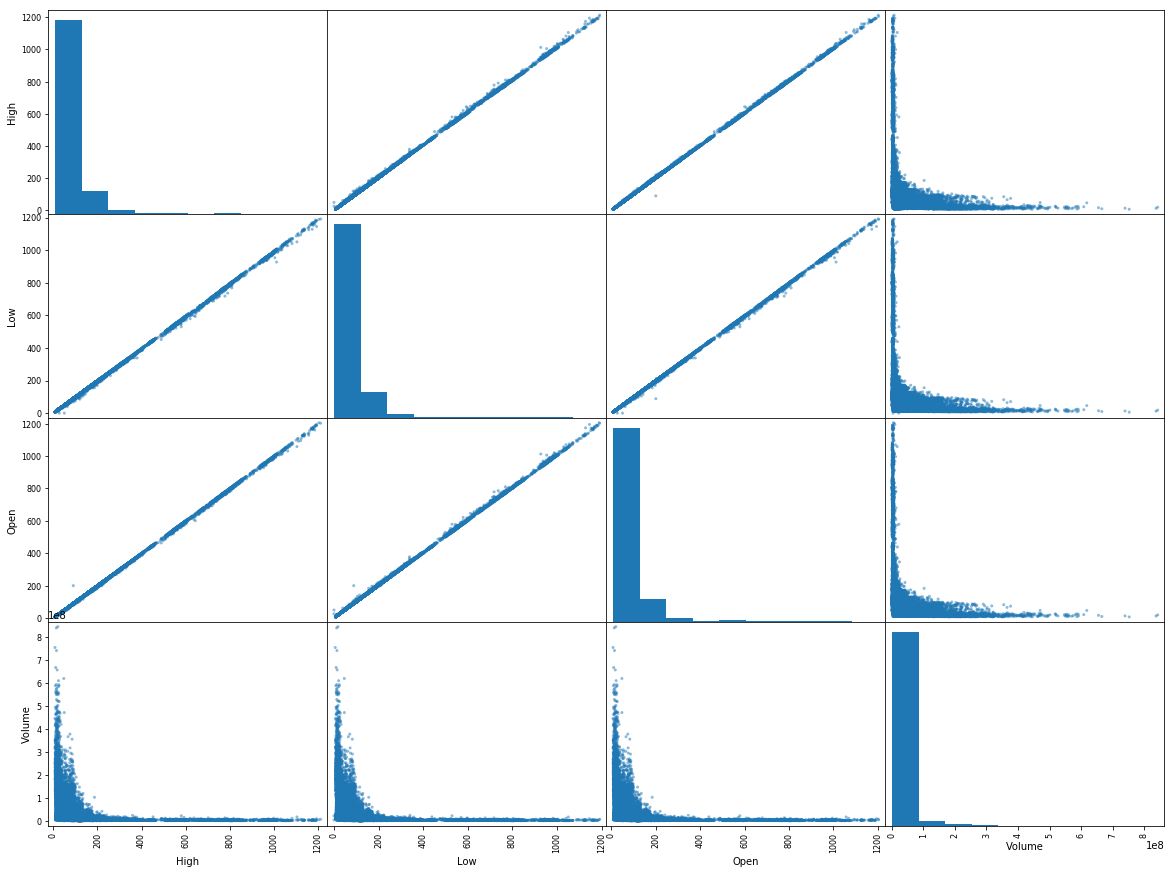

In [19]:
scatter_matrix(all1[["High", "Low", "Open", "Volume"]], figsize=(20, 15))

In [20]:
all1.corr()

Open      High       Low     Close    Volume
Open    1.000000  0.999944  0.999922  0.999884 -0.217769
High    0.999944  1.000000  0.999908  0.999943 -0.217408
Low     0.999922  0.999908  1.000000  0.999946 -0.218488
Close   0.999884  0.999943  0.999946  1.000000 -0.217965
Volume -0.217769 -0.217408 -0.218488 -0.217965  1.000000

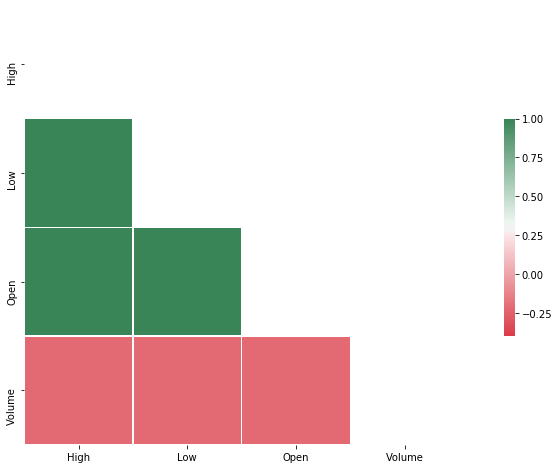

In [21]:
plot_corr_heatmap(all1[["High", "Low", "Open", "Volume"]].corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211173C6080>,
      dtype=object)

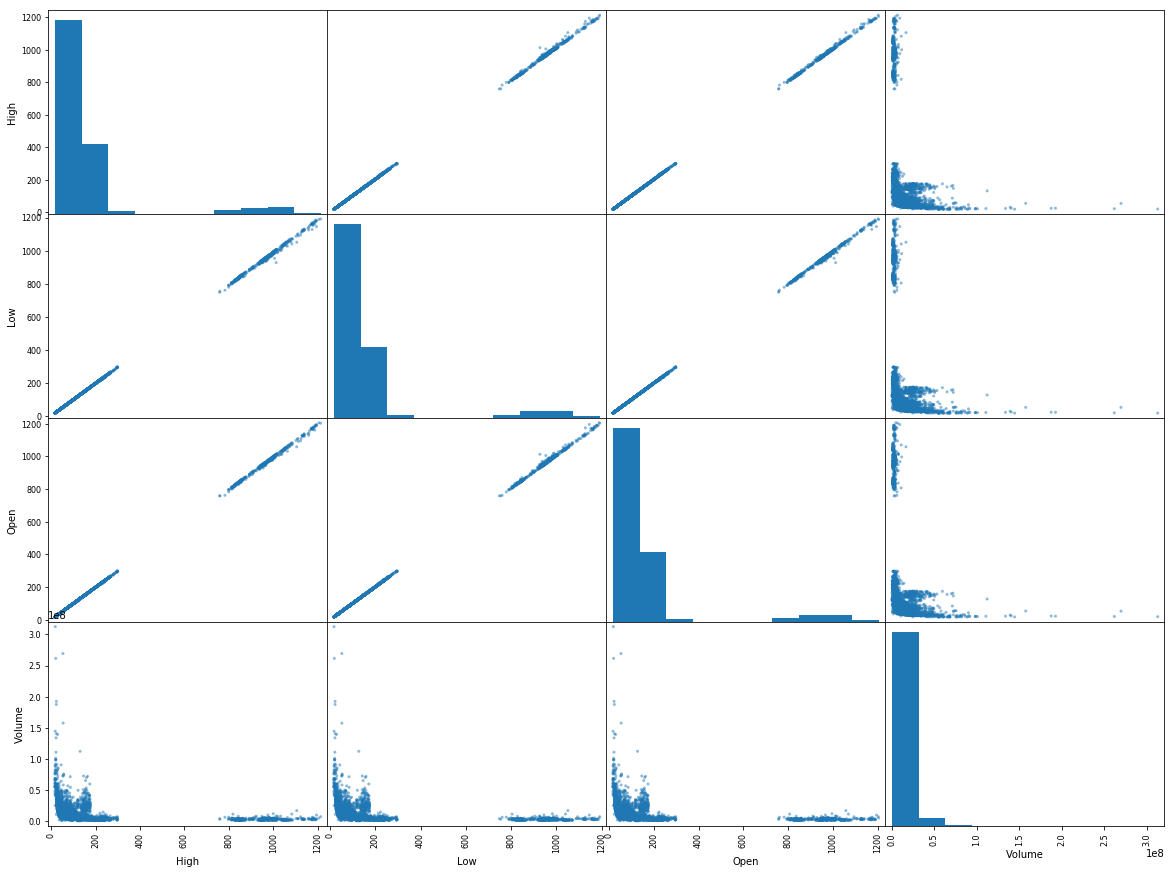

In [22]:
scatter_matrix(all2[["High", "Low", "Open", "Volume"]], figsize=(20, 15))

In [23]:
all2.corr()

Open      High       Low     Close    Volume
Open    1.000000  0.999975  0.999959  0.999941 -0.260274
High    0.999975  1.000000  0.999959  0.999973 -0.259988
Low     0.999959  0.999959  1.000000  0.999976 -0.260826
Close   0.999941  0.999973  0.999976  1.000000 -0.260435
Volume -0.260274 -0.259988 -0.260826 -0.260435  1.000000

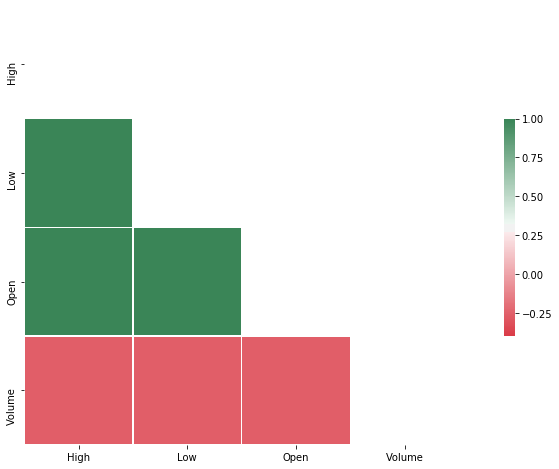

In [24]:
plot_corr_heatmap(all2[["High", "Low", "Open", "Volume"]].corr())

Text(0,0.5,'Price')

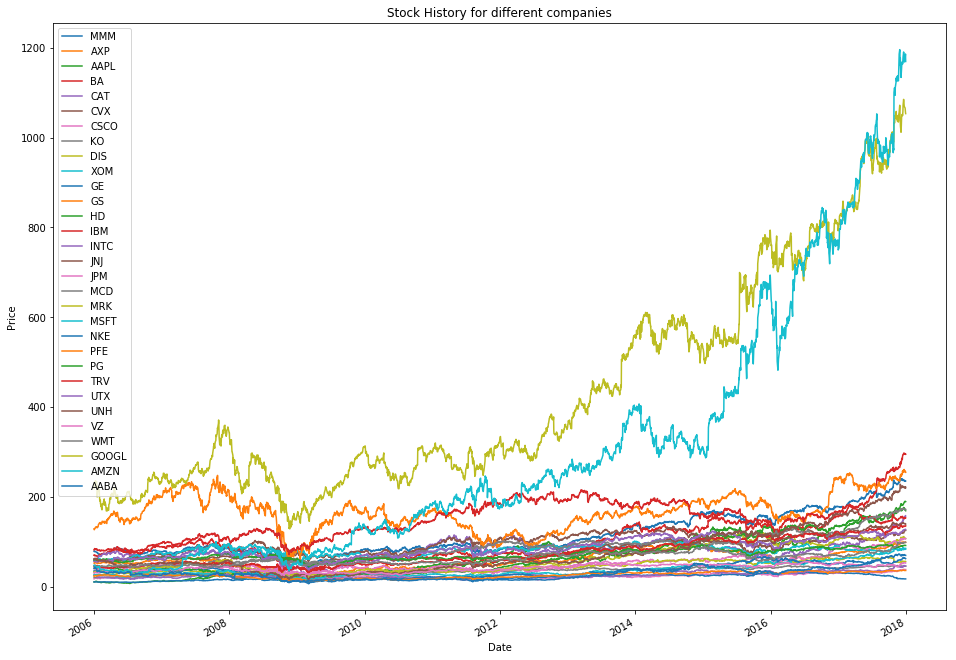

In [146]:
stock.plot(figsize=(16,12))
plt.title("Stock History for different companies")
plt.ylabel("Price")

In [147]:
all1.groupby('Name').mean()['Close'].reset_index().sort_values(['Close'],ascending=False).head(10)

Name       Close
10  GOOGL  428.044001
2    AMZN  299.376231
11     GS  165.611437
13    IBM  145.617278
19    MMM  111.861844
4      BA  101.515868
7     CVX   94.625255
27    UTX   84.906086
18    MCD   84.450921
30    XOM   81.012185

In [152]:
temp=all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2016]
temp.groupby('Name').mean()['Close'].reset_index().sort_values(['Close'],ascending=False).head(10)

Name       Close
10  GOOGL  763.214206
2    AMZN  699.523135
11     GS  169.113810
19    MMM  168.512421
13    IBM  150.514921
26    UNH  135.412500
4      BA  133.111508
12     HD  129.820317
18    MCD  120.141786
15    JNJ  113.607302

In [153]:
temp=all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2015]
temp.groupby('Name').mean()['Close'].reset_index().sort_values(['Close'],ascending=False).head(10)

Name       Close
10  GOOGL  619.988294
2    AMZN  478.138294
11     GS  192.965992
19    MMM  156.382976
13    IBM  155.351944
4      BA  143.505913
1    AAPL  120.039921
26    UNH  116.535516
12     HD  116.382460
8     DIS  107.835516

In [148]:
all2.groupby('Name').mean()['Close'].reset_index().sort_values(['Close'],ascending=False).head(10)

Name       Close
2    AMZN  968.167012
10  GOOGL  939.773386
11     GS  233.587729
4      BA  215.249801
19    MMM  205.293625
26    UNH  186.144940
13    IBM  157.659681
12     HD  155.343267
1    AAPL  150.551036
18    MCD  148.757809

In [150]:
all1.groupby('Name').mean()['Volume'].reset_index().sort_values(['Volume'],ascending=False).head(10)

Name        Volume
1   AAPL  1.311457e+08
9     GE  5.367835e+07
21  MSFT  5.161762e+07
14  INTC  4.919834e+07
6   CSCO  4.440027e+07
23   PFE  3.792700e+07
16   JPM  2.826978e+07
0   AABA  2.158391e+07
30   XOM  1.942885e+07
17    KO  1.684624e+07

In [154]:
temp=all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2016]
temp.groupby('Name').mean()['Volume'].reset_index().sort_values(['Volume'],ascending=False).head(10)

Name        Volume
1   AAPL  3.819770e+07
9     GE  3.539548e+07
23   PFE  3.101163e+07
21  MSFT  3.086962e+07
6   CSCO  2.465443e+07
14  INTC  2.279053e+07
16   JPM  1.702113e+07
28    VZ  1.451170e+07
17    KO  1.335122e+07
0   AABA  1.321715e+07

In [155]:
temp=all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2015]
temp.groupby('Name').mean()['Volume'].reset_index().sort_values(['Volume'],ascending=False).head(10)

Name        Volume
9     GE  5.229211e+07
1   AAPL  5.166643e+07
21  MSFT  3.579466e+07
14  INTC  3.017533e+07
23   PFE  2.871064e+07
6   CSCO  2.697132e+07
16   JPM  1.584375e+07
0   AABA  1.563988e+07
28    VZ  1.511548e+07
17    KO  1.432941e+07

In [156]:
temp=all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2014]
temp.groupby('Name').mean()['Volume'].reset_index().sort_values(['Volume'],ascending=False).head(10)

Name        Volume
1   AAPL  6.323211e+07
21  MSFT  3.339201e+07
6   CSCO  3.284398e+07
14  INTC  3.163601e+07
9     GE  3.162701e+07
23   PFE  2.610996e+07
0   AABA  2.417230e+07
28    VZ  2.203713e+07
16   JPM  1.581666e+07
17    KO  1.531649e+07

In [151]:
all2.groupby('Name').mean()['Volume'].reset_index().sort_values(['Volume'],ascending=False).head(10)

Name        Volume
9     GE  4.583987e+07
1   AAPL  2.713640e+07
14  INTC  2.390555e+07
21  MSFT  2.243715e+07
6   CSCO  2.021477e+07
23   PFE  1.960840e+07
28    VZ  1.551537e+07
16   JPM  1.389666e+07
17    KO  1.136255e+07
0   AABA  1.120503e+07

In [188]:
df = all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2017]
name = df["Name"].unique().tolist()
maxName={}
for j in name:
    values = df[(df["Name"] == j)]["Close"].tolist()
    maxName[j] = max(values)
sorted(maxName.items(), key=lambda kv: kv[1],reverse=True)

[('AMZN', 1195.83),
 ('GOOGL', 1085.09),
 ('BA', 297.9),
 ('GS', 261.01),
 ('MMM', 243.14),
 ('UNH', 228.17),
 ('HD', 190.36),
 ('IBM', 181.95),
 ('AAPL', 176.42),
 ('MCD', 174.2),
 ('CAT', 158.42),
 ('JNJ', 143.62),
 ('TRV', 136.36),
 ('UTX', 128.12),
 ('CVX', 125.98),
 ('DIS', 115.84),
 ('JPM', 107.83),
 ('AXP', 99.7),
 ('WMT', 99.62),
 ('PG', 94.4),
 ('XOM', 90.89),
 ('MSFT', 86.85),
 ('AABA', 72.93),
 ('MRK', 66.58),
 ('NKE', 64.81),
 ('VZ', 54.64),
 ('INTC', 47.56),
 ('KO', 47.43),
 ('CSCO', 38.74),
 ('PFE', 37.2),
 ('GE', 31.7)]

In [189]:
df = all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2016]
name = df["Name"].unique().tolist()
maxName={}
for j in name:
    values = df[(df["Name"] == j)]["Close"].tolist()
    maxName[j] = max(values)
sorted(maxName.items(), key=lambda kv: kv[1],reverse=True)

[('AMZN', 844.36),
 ('GOOGL', 835.74),
 ('GS', 243.09),
 ('MMM', 181.42),
 ('IBM', 168.51),
 ('UNH', 163.94),
 ('BA', 157.81),
 ('HD', 138.77),
 ('MCD', 131.6),
 ('JNJ', 125.4),
 ('TRV', 122.57),
 ('CVX', 118.77),
 ('AAPL', 118.25),
 ('UTX', 110.98),
 ('DIS', 106.6),
 ('CAT', 97.33),
 ('XOM', 95.12),
 ('PG', 90.0),
 ('JPM', 87.13),
 ('AXP', 75.32),
 ('WMT', 74.3),
 ('MRK', 64.96),
 ('NKE', 64.9),
 ('MSFT', 63.62),
 ('VZ', 56.53),
 ('KO', 46.89),
 ('AABA', 44.71),
 ('INTC', 38.1),
 ('PFE', 37.31),
 ('GE', 32.93),
 ('CSCO', 31.87)]

In [190]:
df = all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2015]
name = df["Name"].unique().tolist()
maxName={}
for j in name:
    values = df[(df["Name"] == j)]["Close"].tolist()
    maxName[j] = max(values)
sorted(maxName.items(), key=lambda kv: kv[1],reverse=True)

[('GOOGL', 793.96),
 ('AMZN', 693.97),
 ('GS', 218.4),
 ('IBM', 174.4),
 ('MMM', 170.5),
 ('BA', 158.31),
 ('HD', 134.74),
 ('AAPL', 133.0),
 ('UNH', 125.86),
 ('UTX', 124.11),
 ('DIS', 121.69),
 ('MCD', 120.07),
 ('TRV', 115.83),
 ('CVX', 112.78),
 ('JNJ', 106.39),
 ('XOM', 93.37),
 ('AXP', 93.02),
 ('CAT', 91.88),
 ('PG', 91.62),
 ('WMT', 90.47),
 ('JPM', 70.08),
 ('NKE', 67.16),
 ('MRK', 63.03),
 ('MSFT', 56.55),
 ('VZ', 50.55),
 ('AABA', 50.23),
 ('KO', 43.84),
 ('INTC', 36.91),
 ('PFE', 36.15),
 ('GE', 31.28),
 ('CSCO', 30.19)]

In [191]:
df = all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2014]
name = df["Name"].unique().tolist()
maxName={}
for j in name:
    values = df[(df["Name"] == j)]["Close"].tolist()
    maxName[j] = max(values)
sorted(maxName.items(), key=lambda kv: kv[1],reverse=True)

[('GOOGL', 610.7),
 ('AMZN', 407.05),
 ('IBM', 197.77),
 ('GS', 196.89),
 ('MMM', 167.27),
 ('BA', 144.37),
 ('CVX', 134.85),
 ('UTX', 120.09),
 ('AAPL', 119.0),
 ('CAT', 111.4),
 ('JNJ', 109.07),
 ('TRV', 106.95),
 ('HD', 104.97),
 ('XOM', 104.38),
 ('MCD', 103.53),
 ('UNH', 103.04),
 ('AXP', 95.84),
 ('DIS', 95.5),
 ('PG', 93.46),
 ('WMT', 87.54),
 ('JPM', 63.15),
 ('MRK', 61.88),
 ('AABA', 52.37),
 ('VZ', 51.97),
 ('NKE', 49.66),
 ('MSFT', 49.61),
 ('KO', 44.83),
 ('INTC', 37.67),
 ('PFE', 32.75),
 ('CSCO', 28.46),
 ('GE', 27.5)]

In [192]:
df = all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2013]
name = df["Name"].unique().tolist()
maxName={}
for j in name:
    values = df[(df["Name"] == j)]["Close"].tolist()
    maxName[j] = max(values)
sorted(maxName.items(), key=lambda kv: kv[1],reverse=True)

[('GOOGL', 560.92),
 ('AMZN', 404.39),
 ('IBM', 215.8),
 ('GS', 177.26),
 ('MMM', 140.25),
 ('BA', 138.36),
 ('CVX', 127.76),
 ('UTX', 113.8),
 ('MCD', 103.59),
 ('XOM', 101.51),
 ('CAT', 99.49),
 ('JNJ', 95.63),
 ('TRV', 90.99),
 ('AXP', 90.73),
 ('PG', 85.41),
 ('HD', 82.34),
 ('AAPL', 81.44),
 ('WMT', 81.21),
 ('DIS', 76.4),
 ('UNH', 75.3),
 ('JPM', 58.48),
 ('VZ', 53.91),
 ('MRK', 50.18),
 ('KO', 43.09),
 ('AABA', 40.85),
 ('NKE', 39.93),
 ('MSFT', 38.94),
 ('PFE', 32.2),
 ('GE', 28.03),
 ('CSCO', 26.38),
 ('INTC', 25.96)]

In [193]:
df = all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2015]
name = df["Name"].unique().tolist()
maxName={}
for j in name:
    values = df[(df["Name"] == j)]["Close"].tolist()
    maxName[j] = max(values)
sorted(maxName.items(), key=lambda kv: kv[1],reverse=True)

[('GOOGL', 793.96),
 ('AMZN', 693.97),
 ('GS', 218.4),
 ('IBM', 174.4),
 ('MMM', 170.5),
 ('BA', 158.31),
 ('HD', 134.74),
 ('AAPL', 133.0),
 ('UNH', 125.86),
 ('UTX', 124.11),
 ('DIS', 121.69),
 ('MCD', 120.07),
 ('TRV', 115.83),
 ('CVX', 112.78),
 ('JNJ', 106.39),
 ('XOM', 93.37),
 ('AXP', 93.02),
 ('CAT', 91.88),
 ('PG', 91.62),
 ('WMT', 90.47),
 ('JPM', 70.08),
 ('NKE', 67.16),
 ('MRK', 63.03),
 ('MSFT', 56.55),
 ('VZ', 50.55),
 ('AABA', 50.23),
 ('KO', 43.84),
 ('INTC', 36.91),
 ('PFE', 36.15),
 ('GE', 31.28),
 ('CSCO', 30.19)]

###### With a candlestick chart, a green candlestick indicates a day where the closing price was higher than the open (a gain), while a red candlestick indicates a day where the open was higher than the close (a loss). The wicks indicate the high and the low, and the body the open and close (hue is used to determine which end of the body is the open and which the close). 

In [41]:
def plot_candlestick_ohlc(data, stick = "day", otherseries = None):
    mondays = WeekdayLocator(MONDAY)        
    otherdays = DayLocator()             
    dayFormatter = DateFormatter('%d')      
    ohlc = ["Open", "High", "Low", "Close"]
    temp = data.loc[:,ohlc]
    temp.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plot_temp = temp
            stick = 1 
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                temp["week"] = pd.to_datetime(temp.index).map(lambda x: x.isocalendar()[1]) 
            elif stick == "month":
                temp["month"] = pd.to_datetime(temp.index).map(lambda x: x.month) 
            temp["year"] = pd.to_datetime(temp.index).map(lambda x: x.isocalendar()[0]) 
            grouped = temp.groupby(list(set(["year",stick]))) 
            plot_temp = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []})
            for name, group in grouped:
                plot_temp = plot_temp.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
    elif (type(stick) == int and stick >= 1):
        temp["stick"] = [np.floor(i / stick) for i in range(len(temp.index))]
        grouped = temp.groupby("stick")
        plot_temp = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []})
        for name, group in grouped:
            plot_temp = plot_temp.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
    else:
        raise ValueError('Invalid input for stick')
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plot_temp.index[-1] - plot_temp.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(otherdays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
    ax.grid(True)
    candlestick_ohlc(ax, list(zip(list(date2num(plot_temp.index.tolist())), plot_temp["Open"].tolist(), plot_temp["High"].tolist(),
                      plot_temp["Low"].tolist(), plot_temp["Close"].tolist())),
                      colorup = "green", colordown = "red", width = stick * .4)
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        data.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.rcParams['figure.figsize']=(16,8) 
    plt.show()

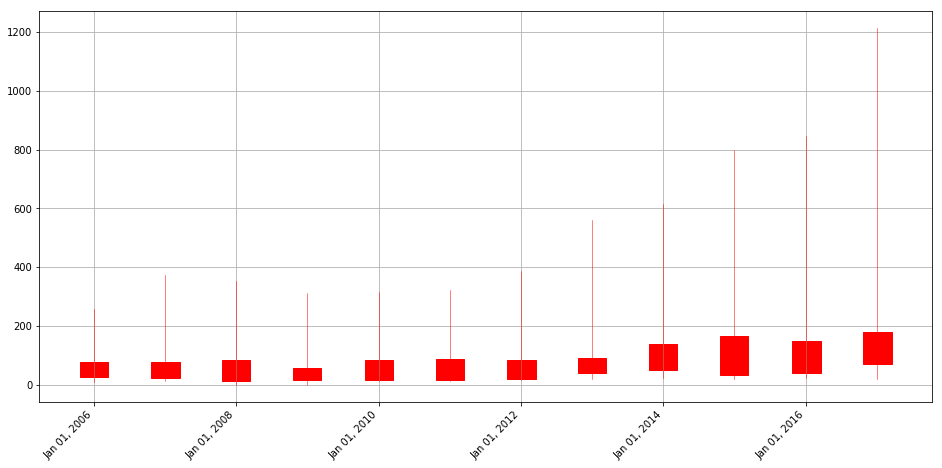

In [195]:
plot_candlestick_ohlc(all1,stick='year')

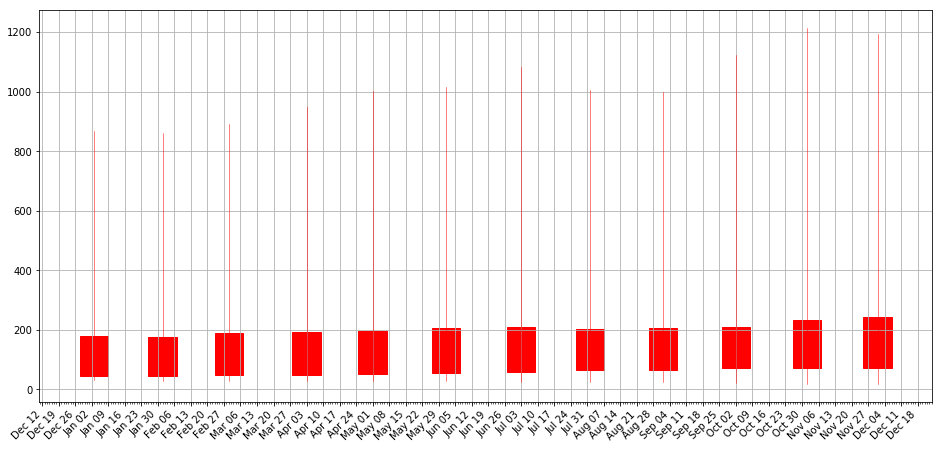

In [43]:
plot_candlestick_ohlc(all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2017],stick='month')

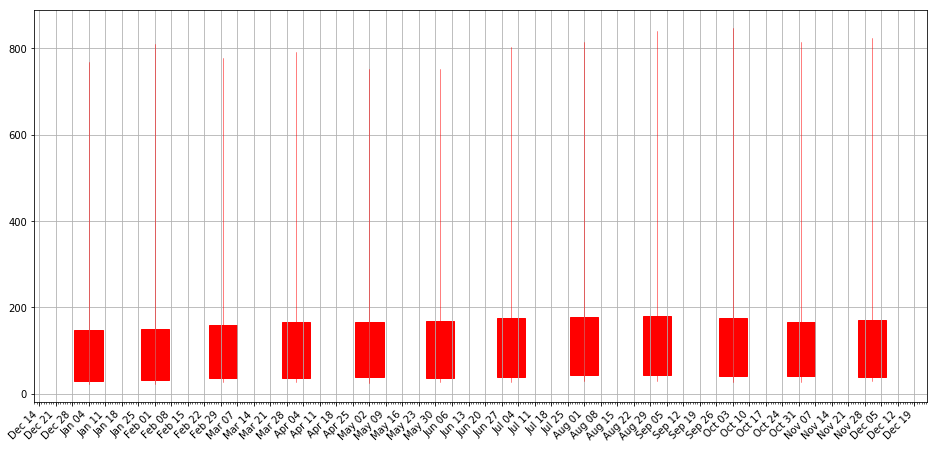

In [44]:
plot_candlestick_ohlc(all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2016],stick='month')

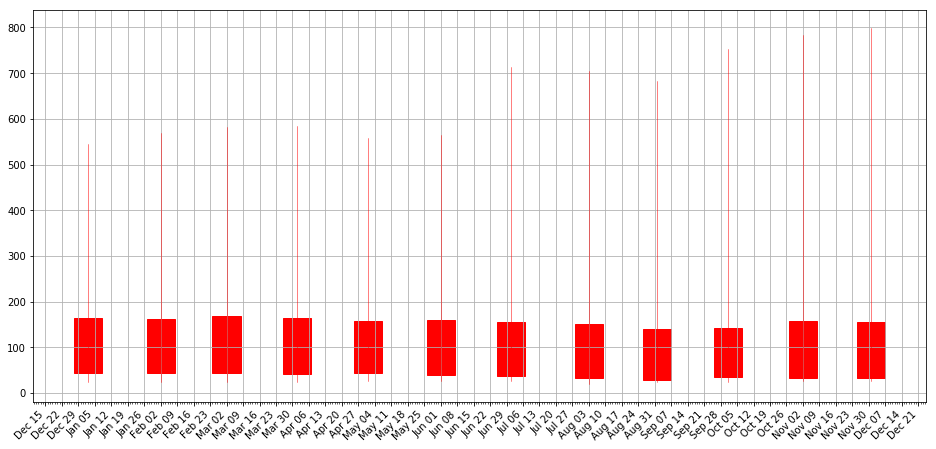

In [45]:
plot_candlestick_ohlc(all1[pd.DatetimeIndex(pd.to_datetime(all1.reset_index()['Date'])).year==2015],stick='month')

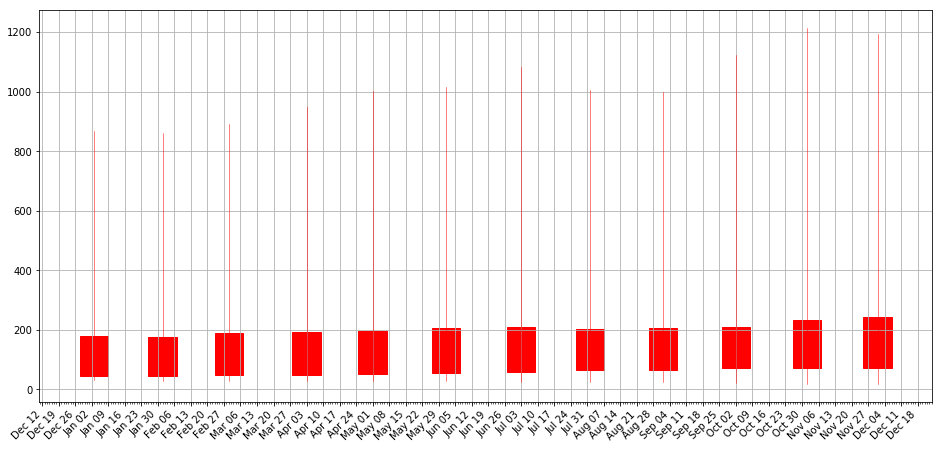

In [47]:
plot_candlestick_ohlc(all2,stick='month')

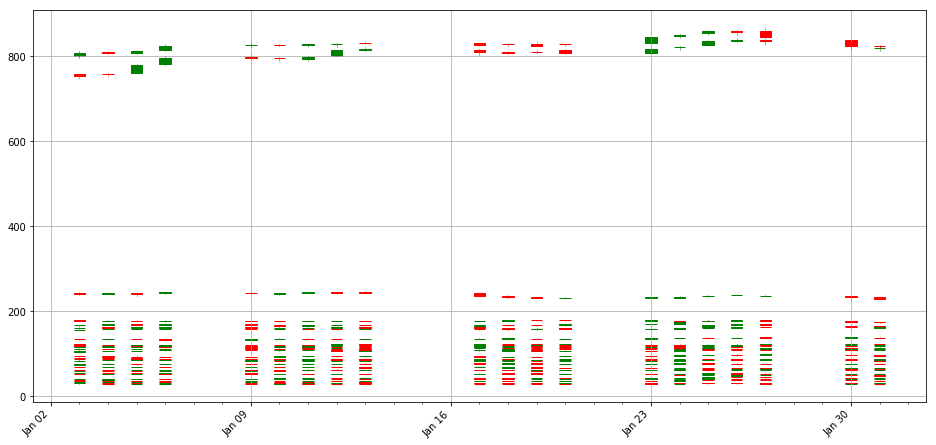

In [48]:
plot_candlestick_ohlc(all2[pd.DatetimeIndex(pd.to_datetime(all2.reset_index()['Date'])).month==1],stick='day')

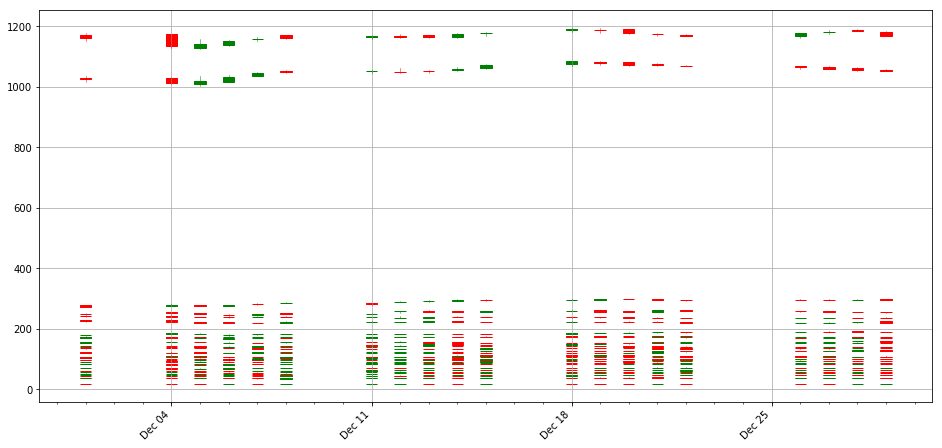

In [49]:
plot_candlestick_ohlc(all2[pd.DatetimeIndex(pd.to_datetime(all2.reset_index()['Date'])).month==12],stick='day')

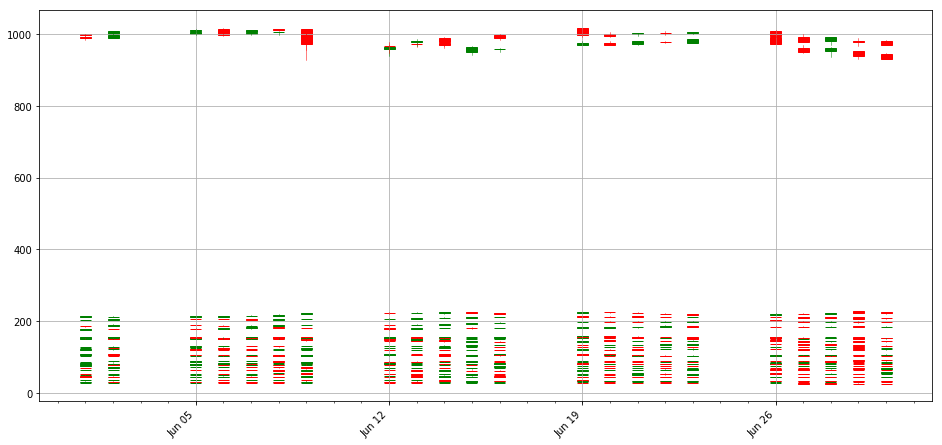

In [50]:
plot_candlestick_ohlc(all2[pd.DatetimeIndex(pd.to_datetime(all2.reset_index()['Date'])).month==6],stick='day')

###### Question 3. You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

The following steps are performed:
1. Coca-cola(KO) and McDonanlds(MCD) are considered for analysis. The correlation matrix shows strong positive correlation between the companies. Strongly correlated stocks are used in pair trading and these companies could be selected as pairs for trading.
2. The output of the describe method shows that the mean value is almost same as the median for all the columns for the KO dataset while it is less than the median for the MCD dataset. There is not much difference between 75% and max values for all the columns in KO dataset. This shows there are no outliers in the KO data. On the other hand, MCD dataset shows significant difference between 75% and max values for all the columns, thus showing presence of outliers.
3. From the volume plot of KO it is seen that the trade volume is highest in 2008 and it is decreasing every year since then whereas for MCD a steep rise is noticed in trade volume in 2008 but it has been dropping since then with a bit high in 2015.
4. The closing price plot of KO shows an exponential increase in stock price while for MCD there is a dip in price in the year 2009 but an increase otherwise. This might be due to the 2008-2009 stock market crash.
Candlestick diagram for KO(yearly): The chart shows that in the beginning of 2008 and 2009 there has been net decline in price of stock and the same behavior is again exhibited in the beginning of 2016.For the rest of the years it has shown net price gains.
Candlestick diagram for MCD(yearly): The chart shows that in the beginning of 2008 and 2009 there has been no net gain in price of stock and the same behavior is again exhibited in the beginning of 2016.Also net decline in price is noticed in the year 2012 and 2014 where in 2012, the net decline in price was maximum of all the years considered in the dataset.
5. Next a return from start price has been plotted and it is seen that the return from KO is much higher than that of MCD. Also if any person bought both the stocks at the start date then after 3 years(during the great depression time) the return the person will get from KO will be much more than that of MCD as it is seen that there is a steep decrease in the return price for MCD but it managed to get back on track in subsequent years.
6. From the percentage change in Stock Price plot it is clearly seen that the stock price of MCD is more volatile than that of KO with more number of spikes in the graph. The difference between the log(price) of one day with that of previous day has been used to calculate the % change in stock price.
7. From the moving average graph, it is noticed that the 20 day moving approach is the sensitive to local changes while the 200 day moving average is least for both KO and MCD considering the year 2016 and 2017.A simple moving average smoothens out the volatility and makes it easier to find the price trend of a stock. A shorter term moving average is more volatile, but its reading is closure to the source data. For KO in the year 2016, it is noticed that short term average is below the long term averages which is indicating a downward movement in the trend. And this crossing over in the trend line happened during the month of August which indicates that there is a trend change and loss trade might be made after that. Also the 200 day moving average indicates an overall bearish trend i.e. the stock is trending downward over time while 20 day moving average is bearish at times but bullish at most times where a positive swing is expected.
For KO in the year 2017,it is noticed that short term average is above the long term averages which is indicating a upward  movement in the trend. The crossover happened during the month of May indicating that there is a trend change and profitable trade might be made after that. Also the 200 day moving average indicates an overall bearish trend i.e. the stock is trending downward over time while 20 day moving average is bearish at times but bullish at most times where a positive swing is expected.
8. For MCD in the year 2016, it is noticed that short term average is sometimes below the long-term averages while at times it is above, which clearly indicates both upward and downward movement in the trend. And this crossing over in the trend line happened during the month of August and December which indicates that there is a trend change and loss trade might be made after that. Also, the 200 day moving average indicates an overall bearish trend i.e. the stock is trending downward over time while 20 day moving average is bearish at times but bullish at most times where a positive swing is expected.
For MCD in the year 2017, it is noticed that short term average is above the long-term averages which is indicating a upward movement in the trend. Also, the 200 day moving average indicates an overall bearish trend i.e. the stock is trending downward over time while 20 day moving average is bearish at times but bullish at most times where a positive swing is expected.
9. Here Exponential moving average is also used to confirm significant market moves and gauge their validity. For traders who trade intra-day and fast-moving market the EMA is more applicable.
Here for both KO (2017) and MCD (2017) it is noticed that the 20 day trend line is showing an upward trend so an intra-day trader's strategy would be probably to trade only from the long side on the intra-day chart.


In [204]:
stock2=pd.DataFrame()
stock2['KO']    =	KO ['Close']
stock2['MCD'] 	=	MCD ['Close']
stock2.corr()

KO      MCD
KO   1.00000  0.91501
MCD  0.91501  1.00000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021146E3B6A0>,
      dtype=object)

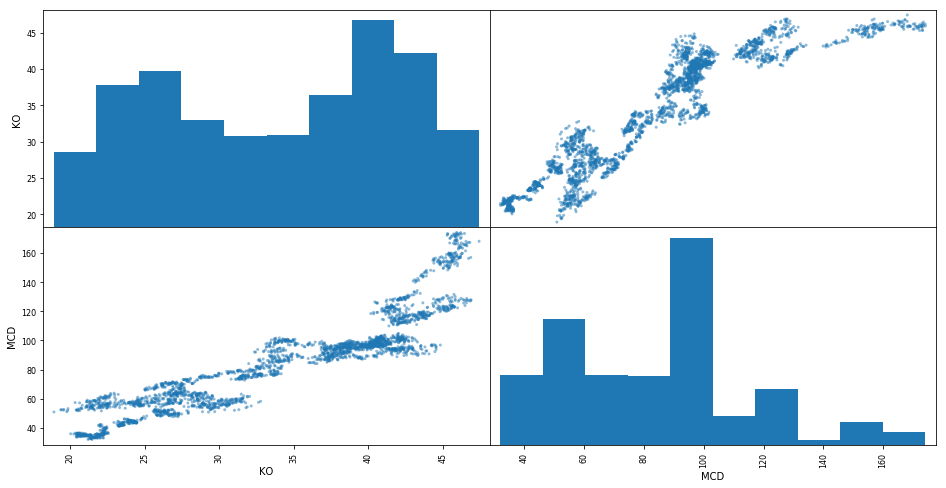

In [198]:
scatter_matrix(stock2)

In [206]:
KO.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3020.000000  3020.000000  3.020000e+03
mean     34.017430    34.244975    33.800017    34.033040  1.684624e+07
std       7.930669     7.944612     7.927611     7.939751  8.046257e+06
min      19.080000    19.600000    18.720000    18.920000  5.995150e+05
25%      26.740000    26.980000    26.555000    26.727500  1.157805e+07
50%      34.420000    34.670000    34.265000    34.480000  1.496542e+07
75%      41.130000    41.380000    40.880000    41.170000  1.991632e+07
max      47.320000    47.480000    46.780000    47.430000  1.241738e+08

In [207]:
MCD.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3020.000000  3020.000000  3.020000e+03
mean     84.400437    84.994515    83.856964    84.450921  6.649816e+06
std      31.000837    31.098925    30.947941    31.040137  3.887800e+06
min      32.000000    32.590000    31.730000    31.940000  6.486180e+05
25%      58.035000    58.675000    57.330000    58.065000  4.332264e+06
50%      88.950000    89.510000    88.125000    88.720000  5.765221e+06
75%      99.110000    99.660000    98.532500    99.235000  7.874860e+06
max     174.870000   175.780000   174.110000   174.200000  8.698180e+07

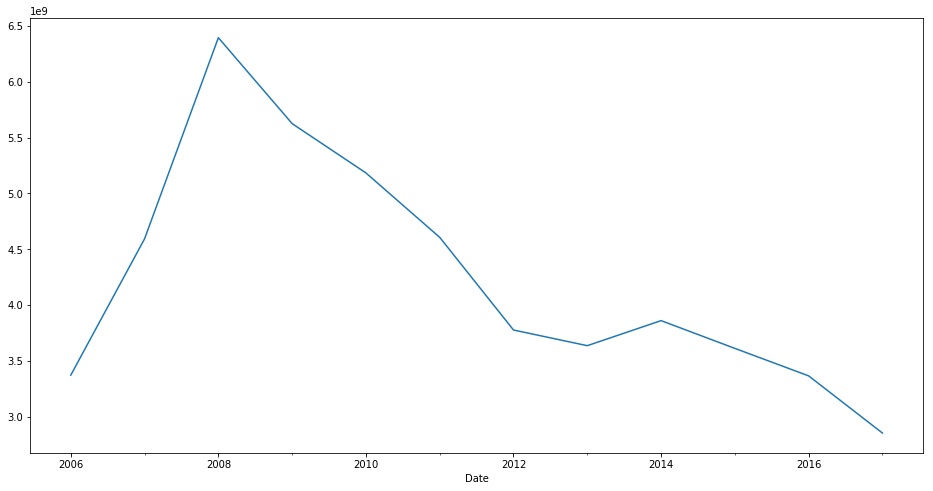

In [200]:
KO_Vol = KO['Volume'].resample('1Y').sum()
KO_Vol.plot()

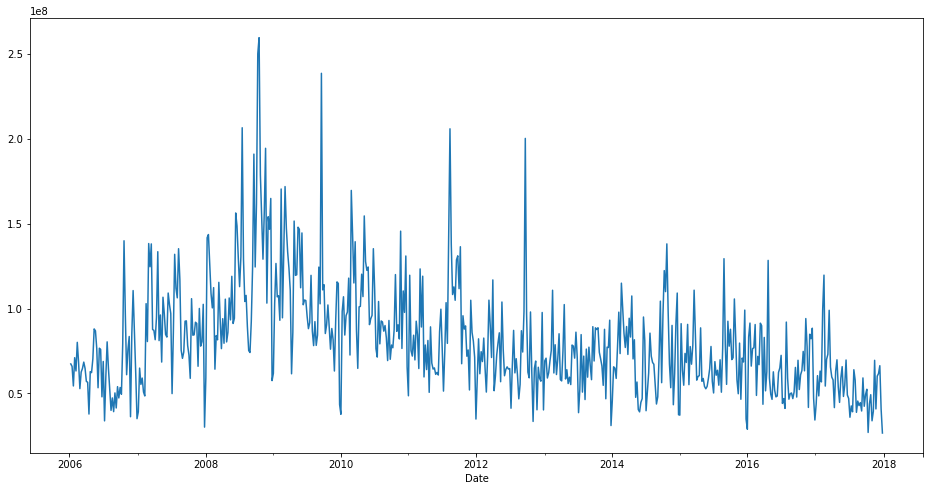

In [52]:
KO_Vol = KO['Volume'].resample('1W').sum()
KO_Vol.plot()

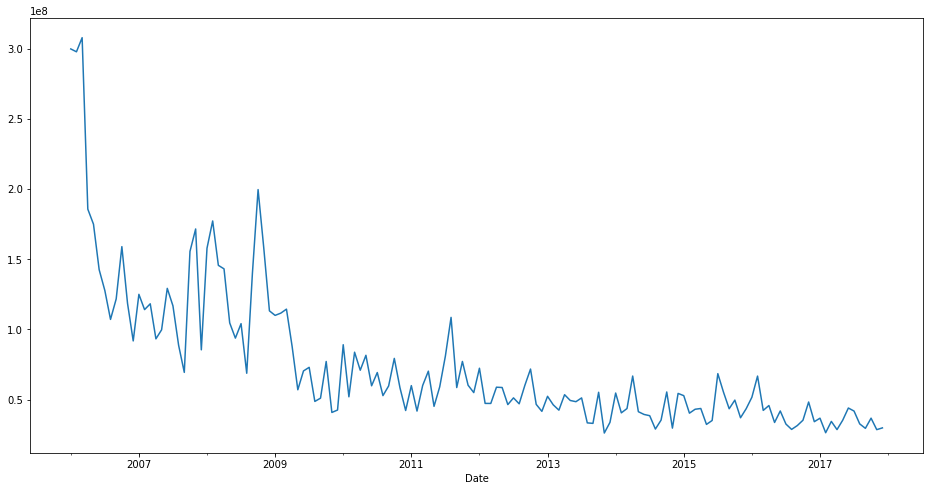

In [53]:
KO_Vol = GOOGL['Volume'].resample('1M').sum()
KO_Vol.plot()

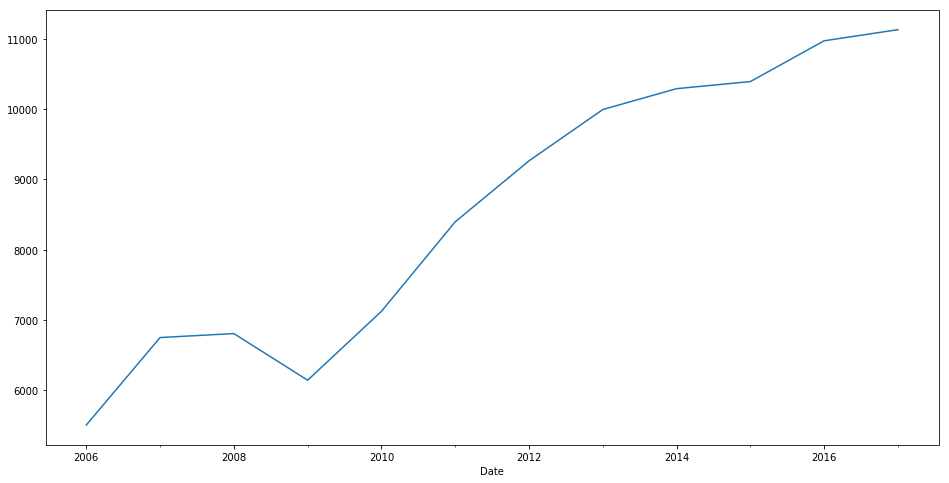

In [54]:
KO_Close = KO['Close'].resample('1Y').sum()
KO_Close.plot()

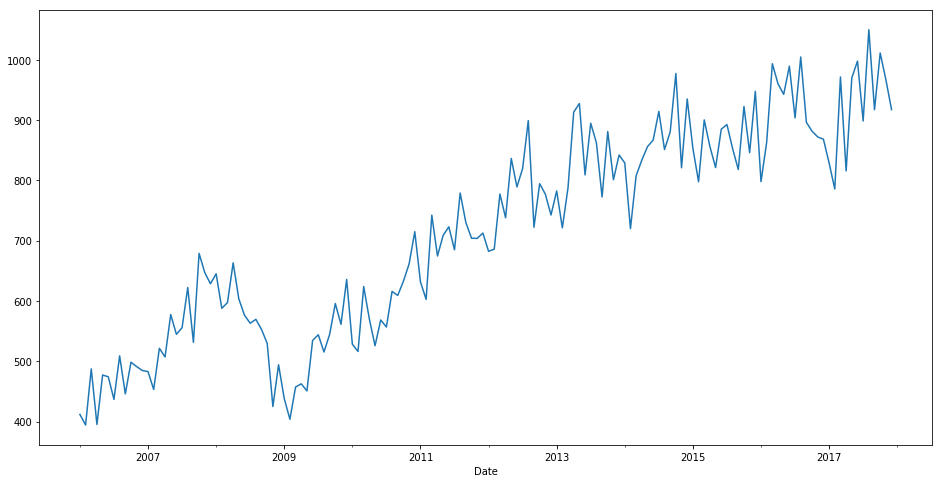

In [55]:
KO_Close = KO['Close'].resample('1M').sum()
KO_Close.plot()

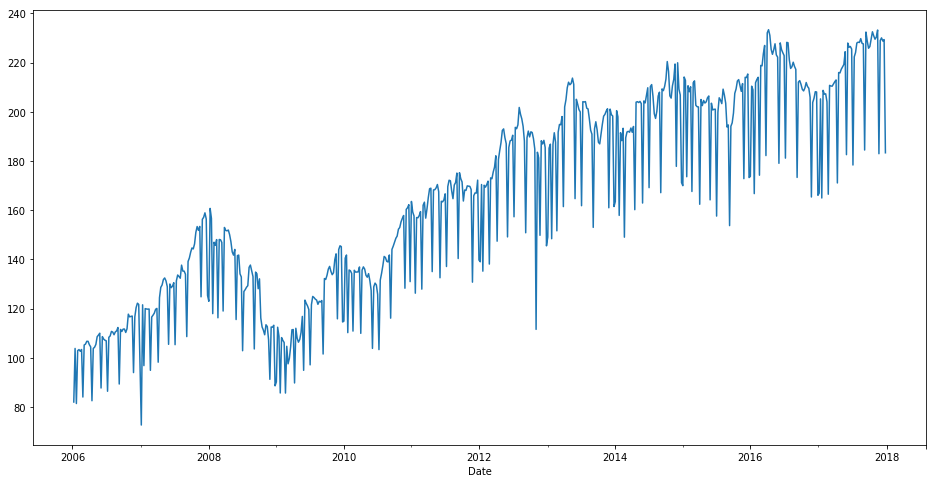

In [56]:
KO_Close = KO['Close'].resample('1W').sum()
KO_Close.plot()

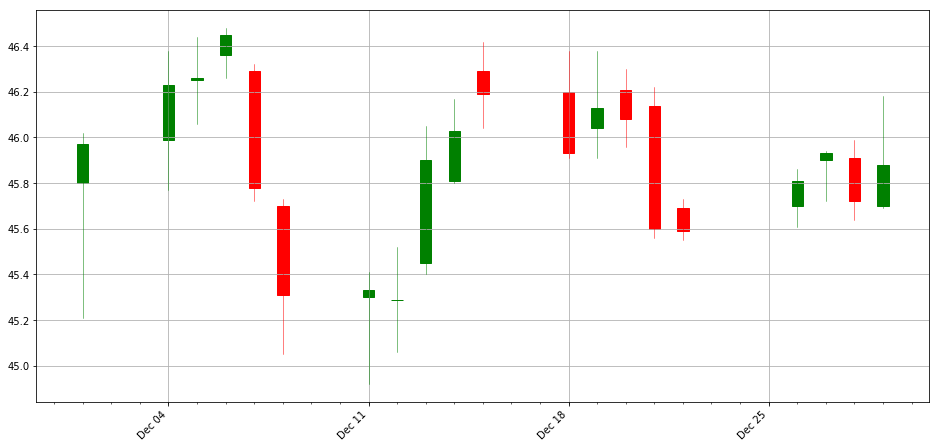

In [57]:
plot_candlestick_ohlc(KO[(pd.DatetimeIndex(pd.to_datetime(KO.reset_index()['Date'])).month==12)&(pd.DatetimeIndex(pd.to_datetime(KO.reset_index()['Date'])).year==2017)],stick='day')

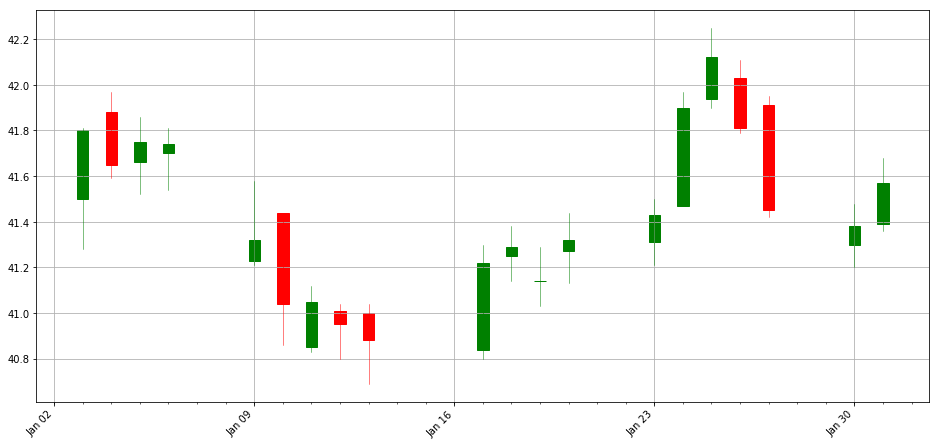

In [58]:
plot_candlestick_ohlc(KO[(pd.DatetimeIndex(pd.to_datetime(KO.reset_index()['Date'])).month==1)&(pd.DatetimeIndex(pd.to_datetime(KO.reset_index()['Date'])).year==2017)],stick='day')

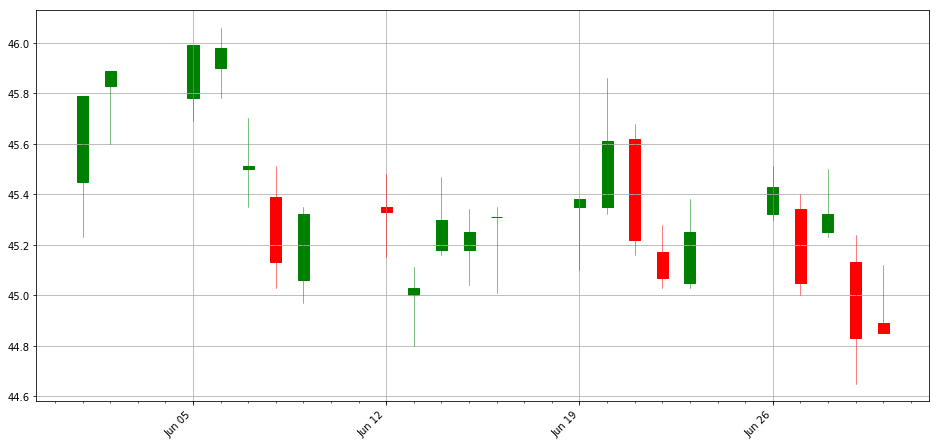

In [59]:
plot_candlestick_ohlc(KO[(pd.DatetimeIndex(pd.to_datetime(KO.reset_index()['Date'])).month==6)&(pd.DatetimeIndex(pd.to_datetime(KO.reset_index()['Date'])).year==2017)],stick='day')

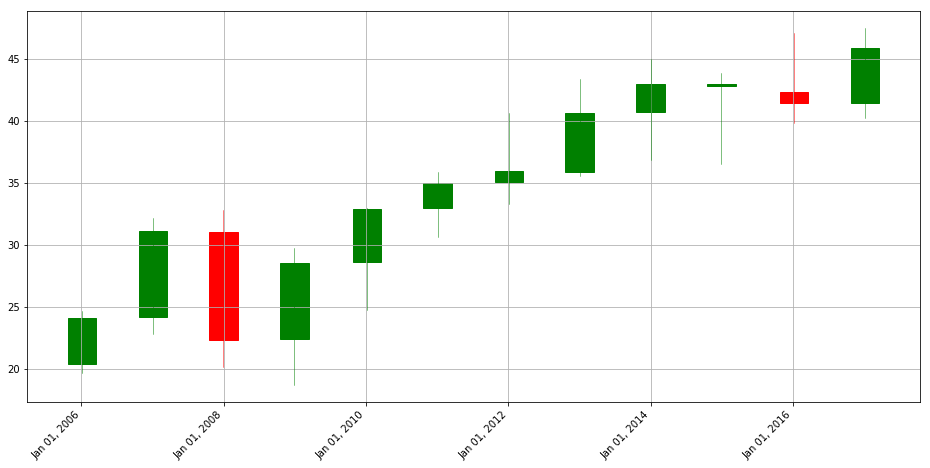

In [60]:
plot_candlestick_ohlc(KO,stick="year")

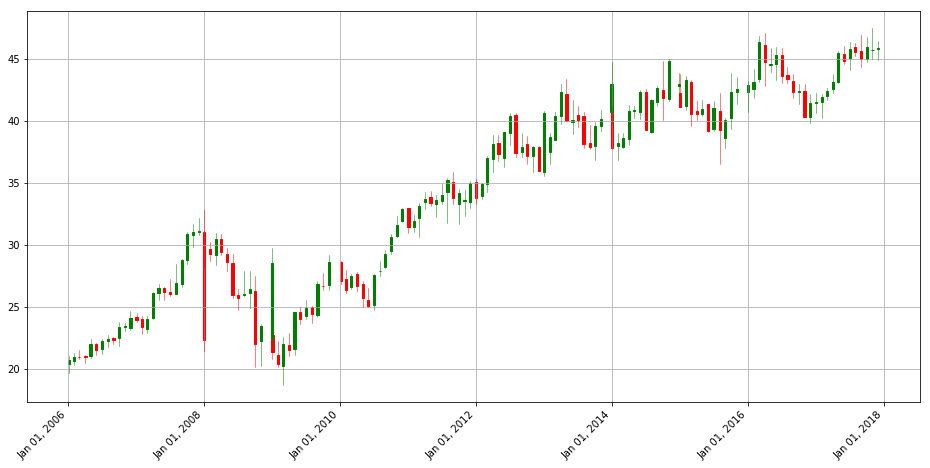

In [61]:
plot_candlestick_ohlc(KO,stick="month")

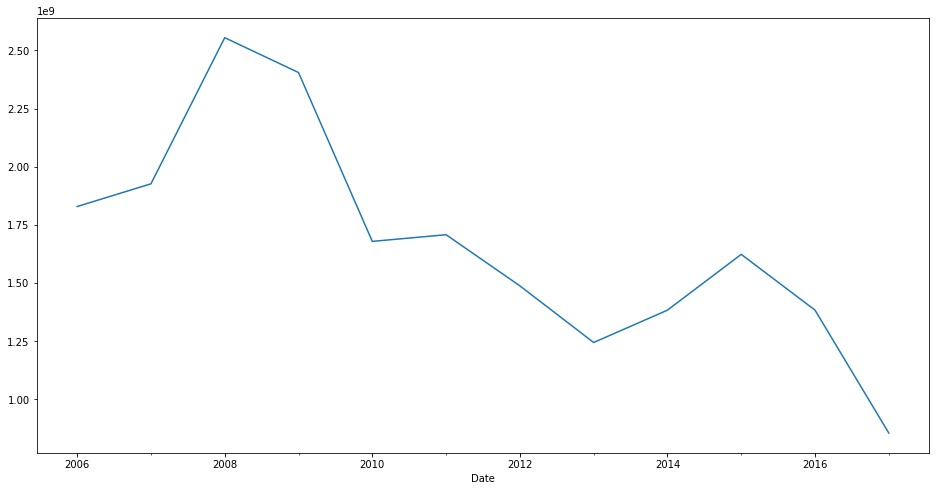

In [62]:
MCD_Vol = MCD['Volume'].resample('1Y').sum()
MCD_Vol.plot()

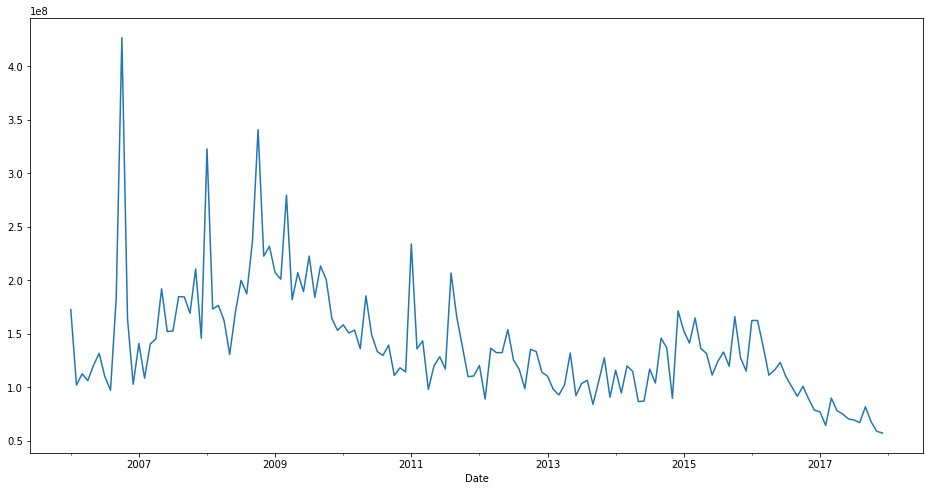

In [63]:
MCD_Vol = MCD['Volume'].resample('1M').sum()
MCD_Vol.plot()

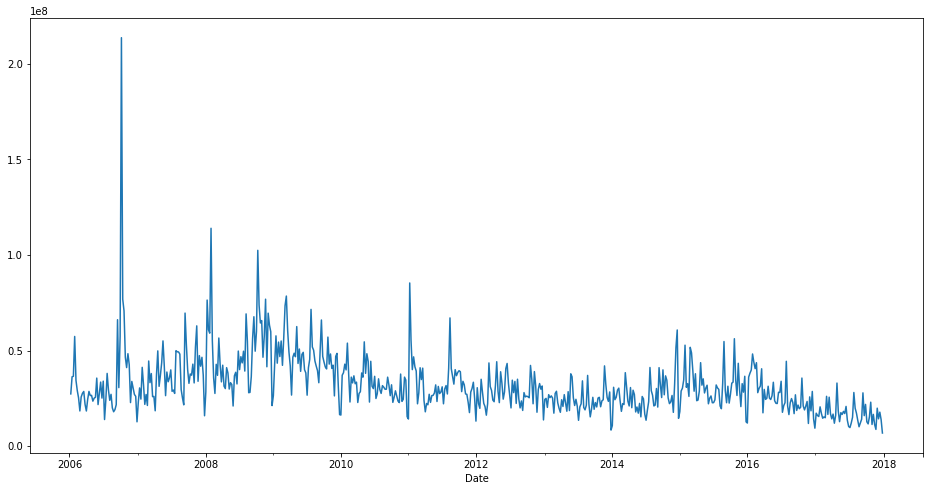

In [64]:
MCD_Vol = MCD['Volume'].resample('1W').sum()
MCD_Vol.plot()

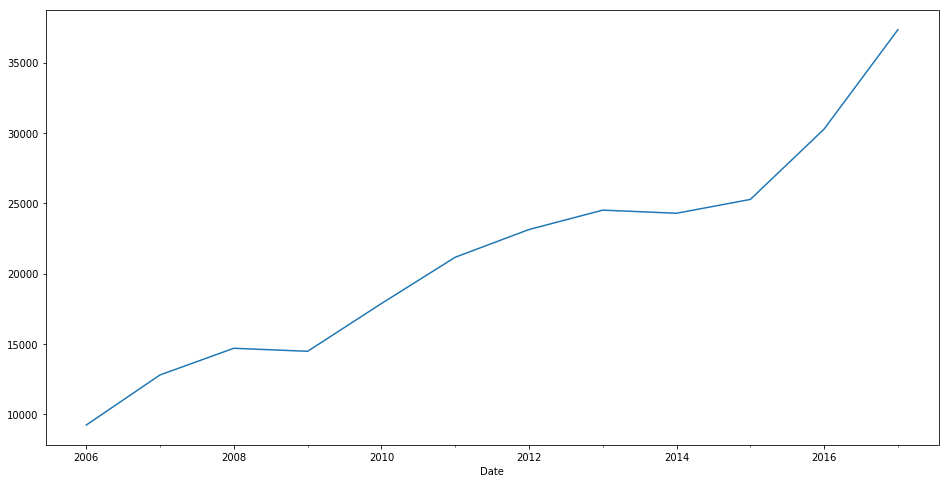

In [65]:
MCD_Close = MCD['Close'].resample('1Y').sum()
MCD_Close.plot()

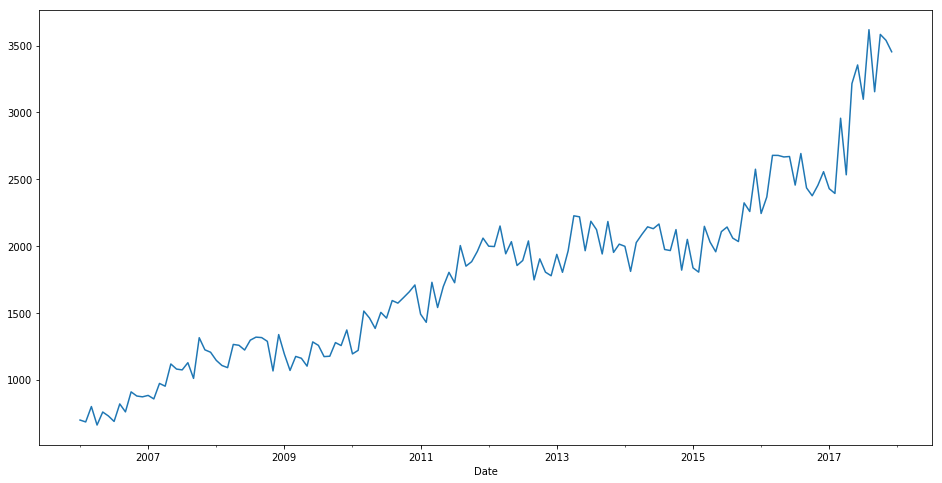

In [66]:
MCD_Close = MCD['Close'].resample('1M').sum()
MCD_Close.plot()

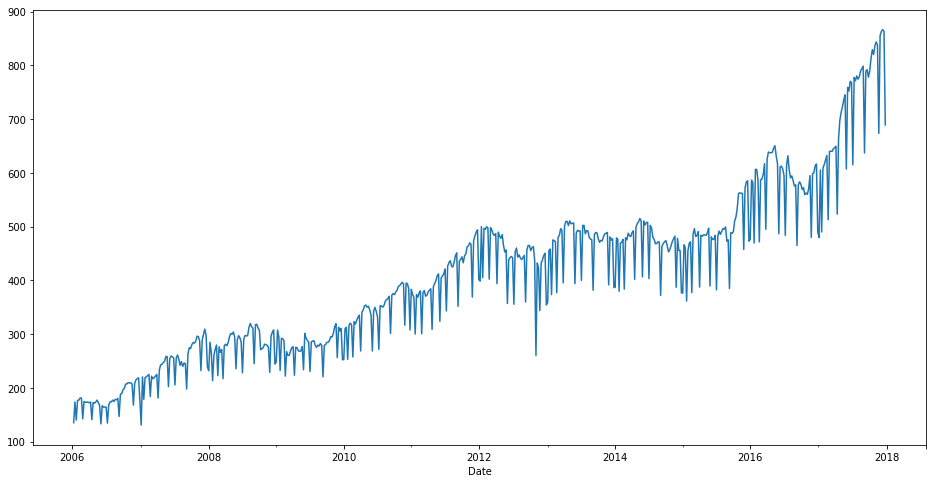

In [67]:
MCD_Close = MCD['Close'].resample('1W').sum()
MCD_Close.plot()

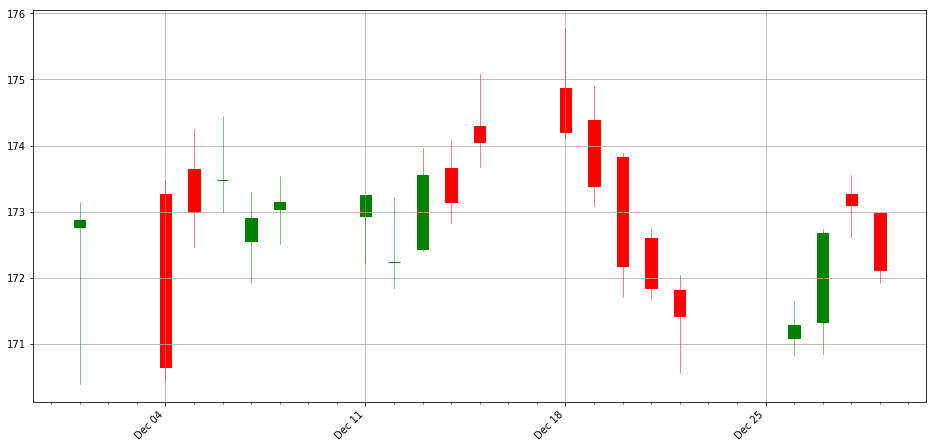

In [68]:
plot_candlestick_ohlc(MCD[(pd.DatetimeIndex(pd.to_datetime(MCD.reset_index()['Date'])).month==12)&(pd.DatetimeIndex(pd.to_datetime(MCD.reset_index()['Date'])).year==2017)],stick='day')

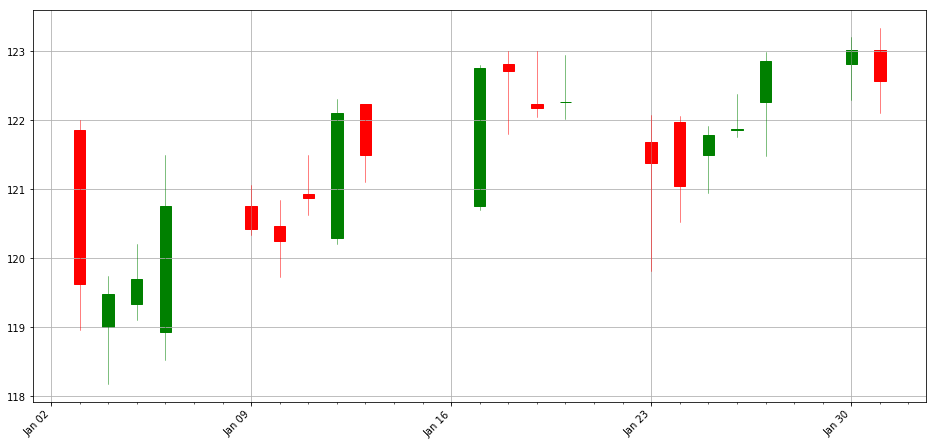

In [69]:
plot_candlestick_ohlc(MCD[(pd.DatetimeIndex(pd.to_datetime(MCD.reset_index()['Date'])).month==1)&(pd.DatetimeIndex(pd.to_datetime(MCD.reset_index()['Date'])).year==2017)],stick='day')

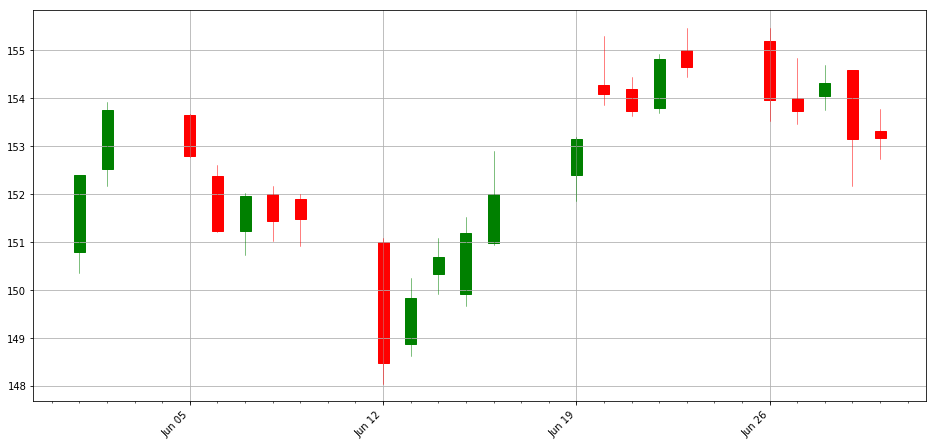

In [70]:
plot_candlestick_ohlc(MCD[(pd.DatetimeIndex(pd.to_datetime(MCD.reset_index()['Date'])).month==6)&(pd.DatetimeIndex(pd.to_datetime(MCD.reset_index()['Date'])).year==2017)],stick='day')

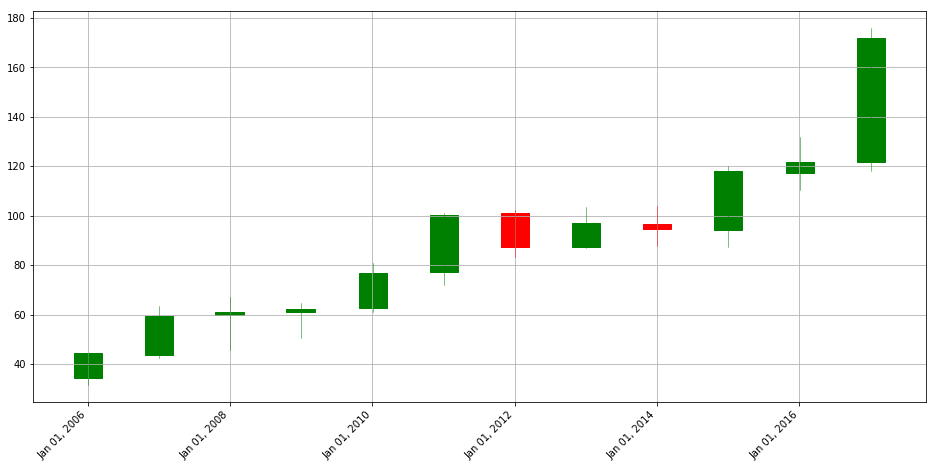

In [71]:
plot_candlestick_ohlc(MCD,stick="year")

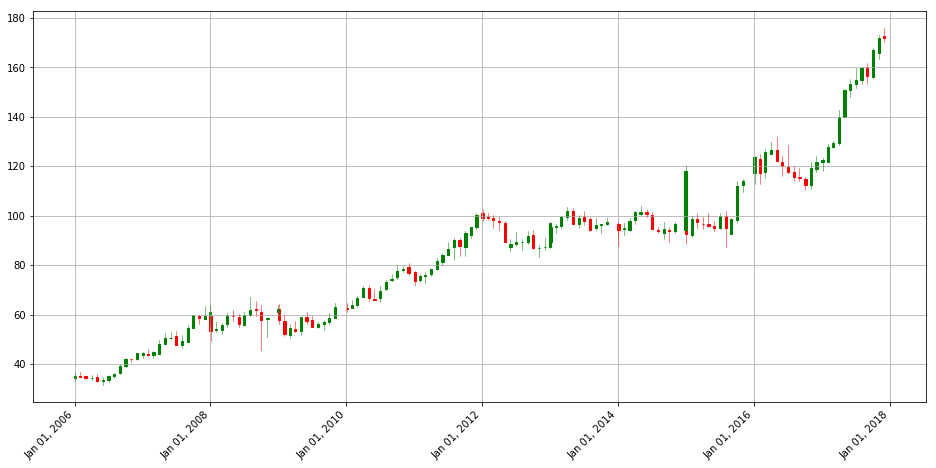

In [72]:
plot_candlestick_ohlc(MCD,stick="month")

###### Stock Return

In [73]:
stocks = pd.DataFrame({"KO": KO["Close"],
                      "MCD": MCD["Close"]})
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

KO       MCD
Date                          
2006-01-03  0.000000  0.000000
2006-01-04 -0.001956  0.008950
2006-01-05  0.002934  0.010143
2006-01-06  0.012225  0.016110
2006-01-09  0.017115  0.035501

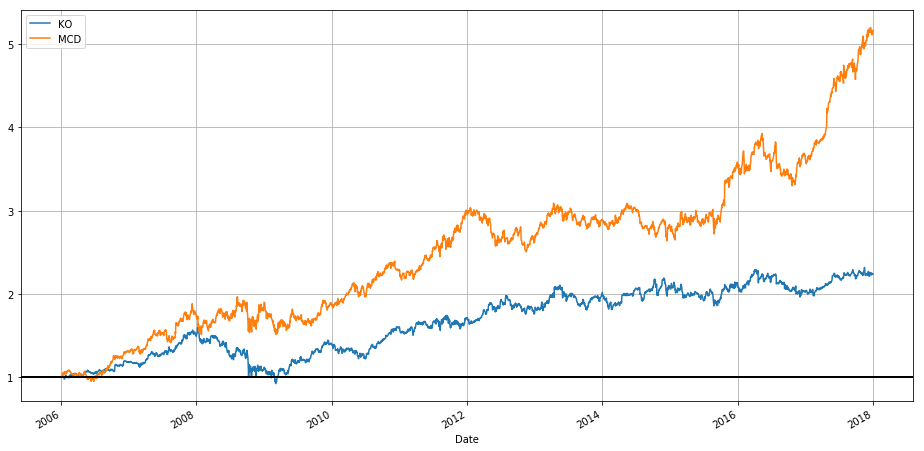

In [74]:
stock_return.plot(grid = True,figsize=(16,8)).axhline(y = 1, color = "black", lw = 2)

###### Percentage change in a stock price

In [75]:
stock_perc_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_perc_change.head()

KO       MCD
Date                          
2006-01-03       NaN       NaN
2006-01-04 -0.001958  0.008910
2006-01-05  0.004888  0.001182
2006-01-06  0.009221  0.005889
2006-01-09  0.004819  0.018904

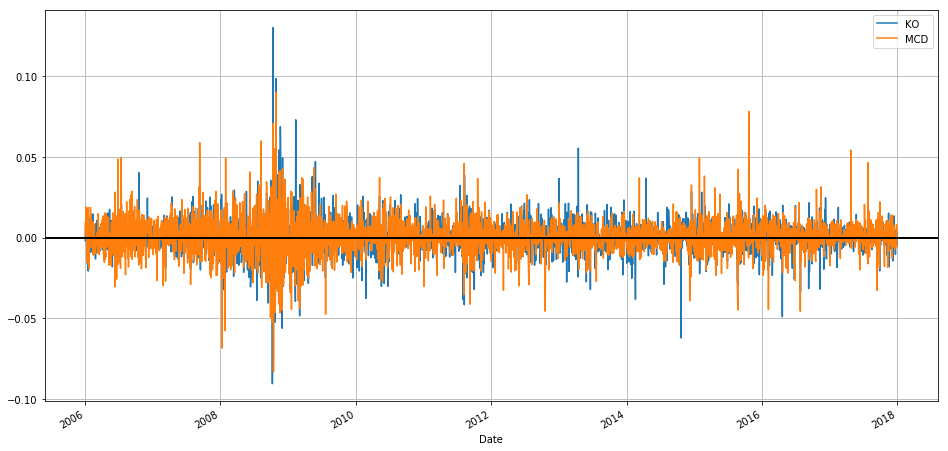

In [76]:
stock_perc_change.plot(grid = True,figsize=(16,8)).axhline(y = 0, color = "black", lw = 2)

###### Simple Moving Average(SMA) - A q-day moving average is, for a series x_t and a point in time t, the average of the past q days. That is, A simple moving average (SMA ) is the arithmetic moving average calculated by adding recent closing prices and then dividing the sum by the number of time periods in the calculation average. 

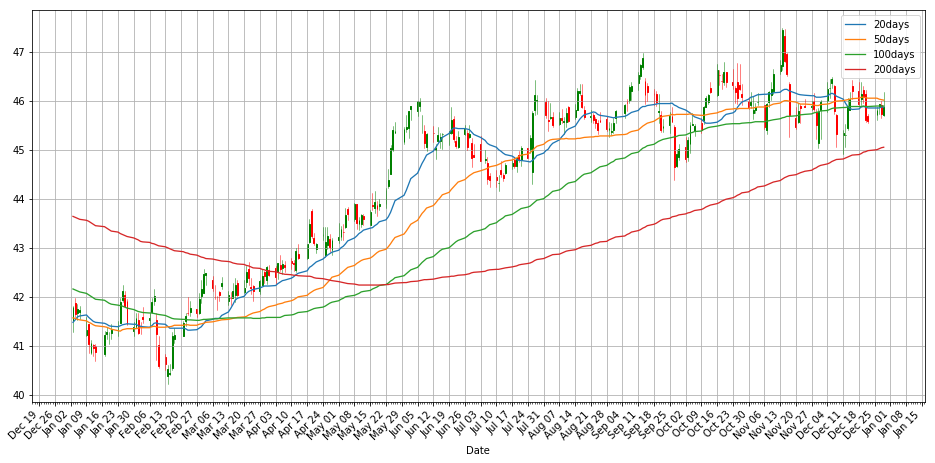

In [208]:
KO["20days"] = np.round(KO["Close"].rolling(window = 20, center = False).mean(), 2)
KO["50days"] = np.round(KO["Close"].rolling(window = 50, center = False).mean(), 2)
KO["100days"] = np.round(KO["Close"].rolling(window = 100, center = False).mean(), 2)
KO["200days"] = np.round(KO["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(KO.loc['2017-01-01':'2017-12-31',:], otherseries = ["20days","50days","100days","200days"])

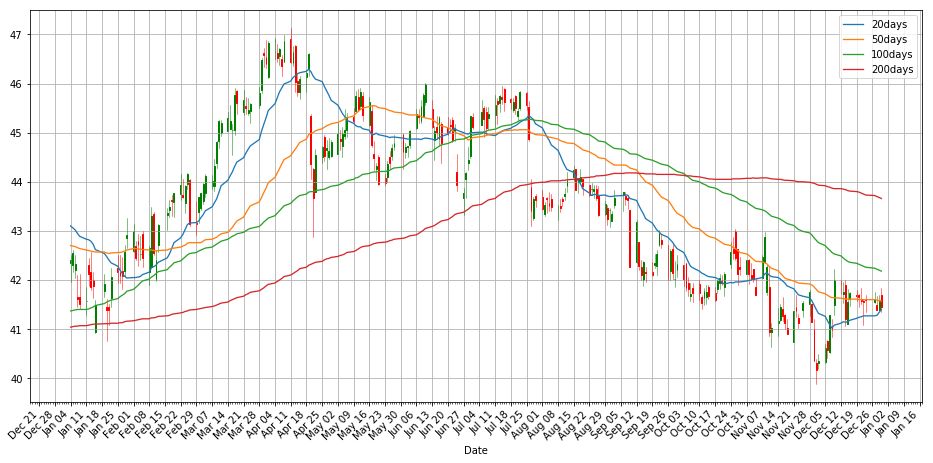

In [222]:
KO["20days"] = np.round(KO["Close"].rolling(window = 20, center = False).mean(), 2)
KO["50days"] = np.round(KO["Close"].rolling(window = 50, center = False).mean(), 2)
KO["100days"] = np.round(KO["Close"].rolling(window = 100, center = False).mean(), 2)
KO["200days"] = np.round(KO["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(KO.loc['2016-01-01':'2016-12-31',:], otherseries = ["20days","50days","100days","200days"])

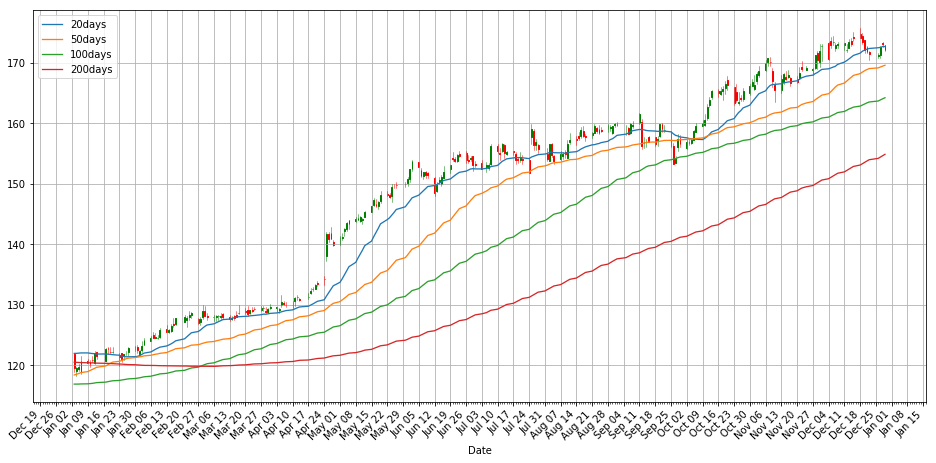

In [209]:
MCD["20days"] = np.round(MCD["Close"].rolling(window = 20, center = False).mean(), 2)
MCD["50days"] = np.round(MCD["Close"].rolling(window = 50, center = False).mean(), 2)
MCD["100days"] = np.round(MCD["Close"].rolling(window = 100, center = False).mean(), 2)
MCD["200days"] = np.round(MCD["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(MCD.loc['2017-01-01':'2017-12-31',:], otherseries = ["20days","50days","100days","200days"])

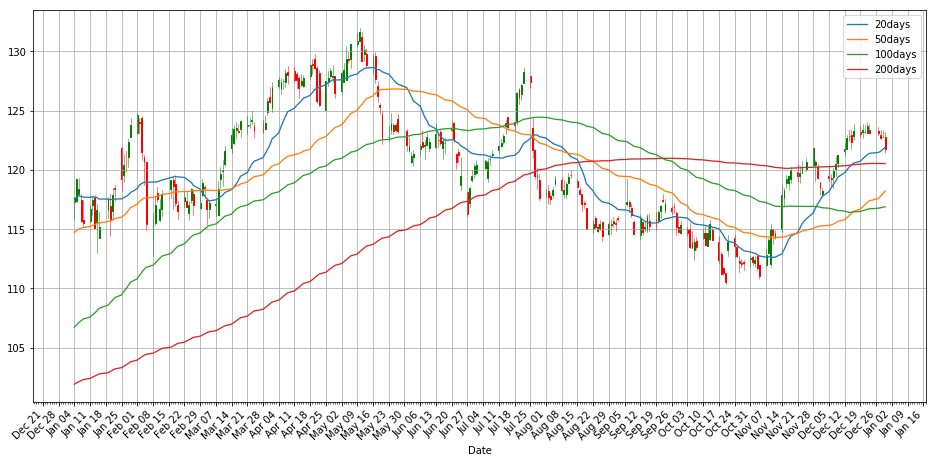

In [223]:
MCD["20days"] = np.round(MCD["Close"].rolling(window = 20, center = False).mean(), 2)
MCD["50days"] = np.round(MCD["Close"].rolling(window = 50, center = False).mean(), 2)
MCD["100days"] = np.round(MCD["Close"].rolling(window = 100, center = False).mean(), 2)
MCD["200days"] = np.round(MCD["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(MCD.loc['2016-01-01':'2016-12-31',:], otherseries = ["20days","50days","100days","200days"])

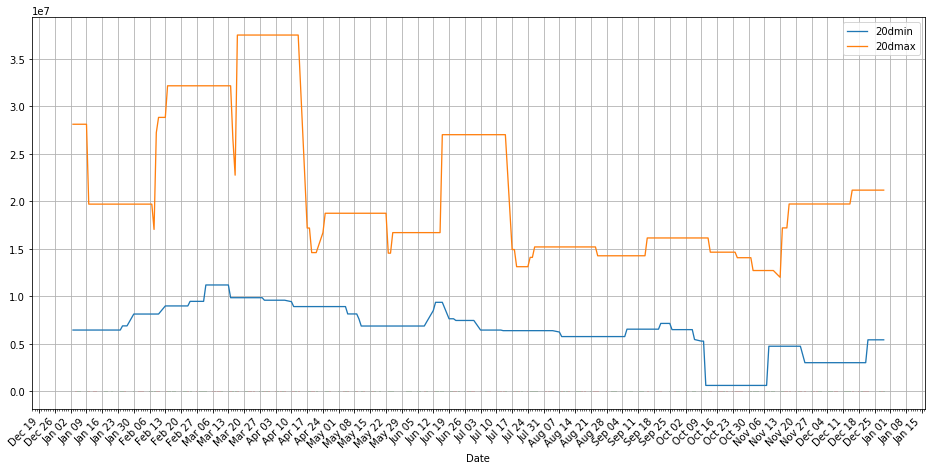

In [211]:
KO["20dmin"] = np.round(KO["Volume"].rolling(window = 20, center = False).min(), 2)
KO["20dmax"] = np.round(KO["Volume"].rolling(window = 20, center = False).max(), 2)
plot_candlestick_ohlc(KO.loc['2017-01-01':'2017-12-31',:], otherseries = ["20dmin","20dmax"])

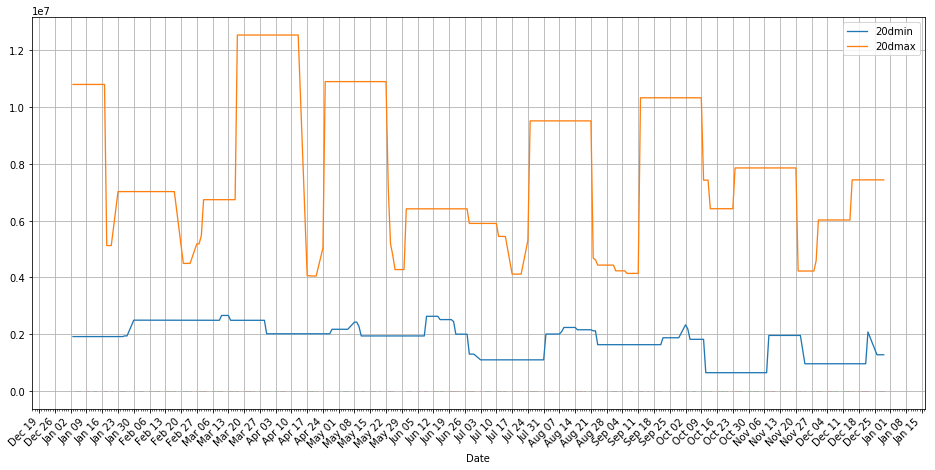

In [210]:
MCD["20dmin"] = np.round(MCD["Volume"].rolling(window = 20, center = False).min(), 2)
MCD["20dmax"] = np.round(MCD["Volume"].rolling(window = 20, center = False).max(), 2)
plot_candlestick_ohlc(MCD.loc['2017-01-01':'2017-12-31',:], otherseries = ["20dmin","20dmax"])

###### Exponential Moving Average(EMA) - The exponential moving average (EMA) is a weighted moving average (WMA) that gives more weighting, or importance, to recent price data than the simple moving average (SMA) does.

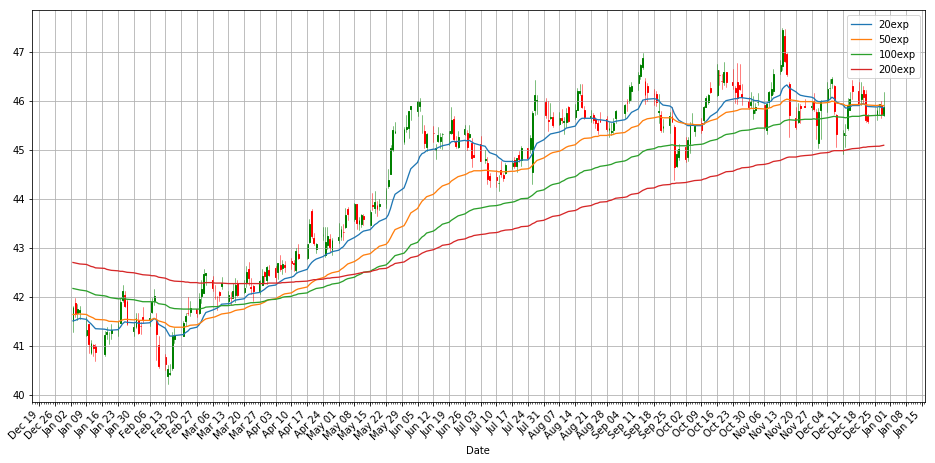

In [81]:
KO["20exp"]=np.round(KO['Close'].ewm( span = 20, min_periods = 20 - 1).mean(),2)
KO["50exp"]=np.round(KO['Close'].ewm( span = 50, min_periods = 50 - 1).mean(),2)
KO["100exp"]=np.round(KO['Close'].ewm( span = 100, min_periods = 100 - 1).mean(),2)
KO["200exp"]=np.round(KO['Close'].ewm( span = 200, min_periods = 200 - 1).mean(),2)
plot_candlestick_ohlc(KO.loc['2017-01-01':'2017-12-31',:], otherseries = ["20exp","50exp","100exp","200exp"])

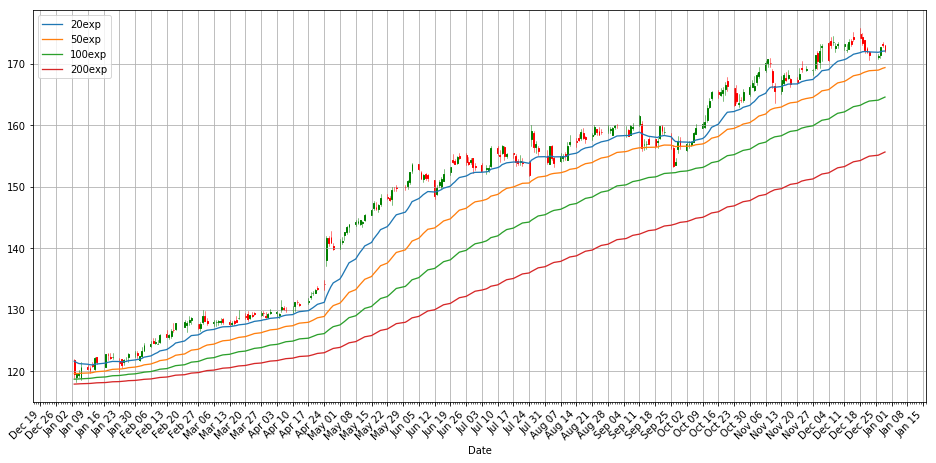

In [82]:
MCD["20exp"]=np.round(MCD['Close'].ewm( span = 20, min_periods = 20 - 1).mean(),2)
MCD["50exp"]=np.round(MCD['Close'].ewm( span = 50, min_periods = 50 - 1).mean(),2)
MCD["100exp"]=np.round(MCD['Close'].ewm( span = 100, min_periods = 100 - 1).mean(),2)
MCD["200exp"]=np.round(MCD['Close'].ewm( span = 200, min_periods = 200 - 1).mean(),2)
plot_candlestick_ohlc(MCD.loc['2017-01-01':'2017-12-31',:], otherseries = ["20exp","50exp","100exp","200exp"])

###### Question 4. Take five stocks of your choice and create the same type of report stated in question 3.

The following steps are performed:
1. Google(GOOGL), Microsoft(MSFT), IBM, Apple(AAPL) and Intel Corporation(INTC) are considered for analysis. All these companies are from IT sector and the correlation matrix shows strong positive correlation among most of the companies. Strongly correlated stocks are used in pair trading and these companies could be selected as pairs for trading.
2. The output of the describe method shows that the mean value is higher than median for all the columns for the AAPL, MSFT, GOOGL, INTC dataset while it less than the median for the IBM dataset. Except the INTC dataset, all the others show difference between 75% and max values for all the columns, thus showing presence of outliers.
3. From the volume plots it is seen that other that 2008, there is a steep decrease in trade volume with years for all the companies. 
4. The closing price plot of GOOGL and MSFT shows an increase in stock price every year, for INTC there is a dip in price in the year 2009 and 2015 but an increase otherwise, for AAPL there is a dip in price in the year 2013 and 2015 but an increase otherwise. For IBM there is an increase in price from 2009 to 2012 while there is a sharp decrease in price 2012 onwards. However, the prices for IBM seems to be increasing a bit in the year 2017.
5. Next a return from start price has been plotted and it is seen that the return from Apple stands out from the rest. Among the others, return from Google is much higher following MSFT, IBM and lastly INTCL. Also if any person bought both the stocks at the start date then after 3 years(during the great depression time) the return he will get from all the stocks will be less but after that period stock price of APPL ,MSFT,IBM and GOOGL has increased in subsequent years. But stock return of INTCL has not changed much with a slight increase in return than that of 2009 depression.
6. From the Percentage change in Stock Price plot it is clearly seen that the stock price of GOOGL is more volatile than the rest with more number of spikes in the graph followed by MSFT. The difference between the log(price) of one day with that of previous day has been used to calculate the % change in stock price.
7. From the moving average graph, it is noticed that the 20 day moving approach is the most sensitive to local changes while the 200 day moving average is least in all cases. A simple moving average smoothens out the volatility and makes it easier to find the price trend of a stock. A shorter term moving average is more volatile but its reading is closure to the source data.
8. For MSFT in the year 2017, it is noticed that short term average is above the long term averages which is indicating a upward movement in the trend. There is no crossover happened during the tenure(for 20 day and 200 day) indicating that there has not been any trend change happening .Also the 200 day moving average indicates an overall bullish trend i.e. the stock is trending upward over time while 20 day moving average is bearish at times but bullish at most times where a positive swing is expected.
9. For GOOGL in the year 2017, it is noticed that short term average is above the long term averages which is indicating a upward  movement in the trend. There is no crossover happened during the tenure(for 20 day and 200 day) indicating that there has not been any trend change happening .Also the 200 day moving average indicates an overall bullish trend i.e. the stock is trending upward over time while 20 day moving average is bearish at times but bullish at most times where a positive swing is expected.
10. For IBM in the year 2017, it is noticed that short term average is sometimes above the long-term averages but most of the times below, which is indicating a downward movement in the trend. There is two crossover happened during the tenure (for 20 day and 200 day) during the month of May and December indicating that there has been a trend change happening and after the December crossover one might expect somewhat profitable as the 20 day trend line is showing upward trend. Also, the 200 day moving average indicates an overall bearish trend i.e. the stock is trending downward over time while 20 day moving average is bearish at most of the times but bullish at times where a positive swing is expected.
11. For APPL in the year 2017, it is noticed that short term average is above the long-term averages which is indicating a upward movement in the trend. There is no crossover happened during the tenure (for 20 day and 200 day) indicating that there has not been any trend change happening. Also the 200 day moving average indicates an overall bullish trend i.e. the stock is trending upward over time and is consistent while 20 day moving average is bearish at times but bullish at most of the times where a positive swing is expected.
12. For IBM in the year 2017, it is noticed that short term average is sometimes below the long-term averages but at times above, which is indicating an upward movement in the trend. There is has been multiple crossover happening during the tenure (for 20 day and 200 day) indicating that there has been a trend change happening but after the September crossover one might expect profitable return as the 20 day trend line is showing upward trend. Also, the 200 day moving average indicates an overall bearish trend i.e. the stock is trending downward over time while 20 day moving average is bearish at most of the times but bullish at times where a positive swing is expected. Also, it is noticed that there is a significant rise in return during the months of September to November which is its 17 year highest.
13. Here Exponential moving average is also used to confirm significant market moves and gauge their validity. For traders who trade intra-day and fast-moving market the EMA is more applicable.
14. For both MSFT (2017), GOOGL(2017) and AAPL(2017)  it is noticed that the 20 day trend line is showing an upward trend so an intra-day trader's strategy would be probably to trade only from the long side on the intra-day chart as the market is strong and sustained. For IBM (2017) it is noticed that the 20 day trend line is showing a continuous downward trend. For INTC (2017) it is noticed that the 20 day trend line is showing a constant trend and then after September it is showing upward trend which again shows that the market is sustained for this stock.


In [212]:
stock3=pd.DataFrame()
stock3['GOOGL']    =	GOOGL ['Close']
stock3['IBM'] 	=	IBM ['Close']
stock3['AAPL']    =	AAPL ['Close']
stock3['MSFT'] 	=	MSFT ['Close']
stock3['INTC']    =	INTC ['Close']
stock3.corr()

GOOGL       IBM      AAPL      MSFT      INTC
GOOGL  1.000000  0.410302  0.912855  0.968973  0.899718
IBM    0.410302  1.000000  0.619814  0.289231  0.430233
AAPL   0.912855  0.619814  1.000000  0.874883  0.887671
MSFT   0.968973  0.289231  0.874883  1.000000  0.925490
INTC   0.899718  0.430233  0.887671  0.925490  1.000000

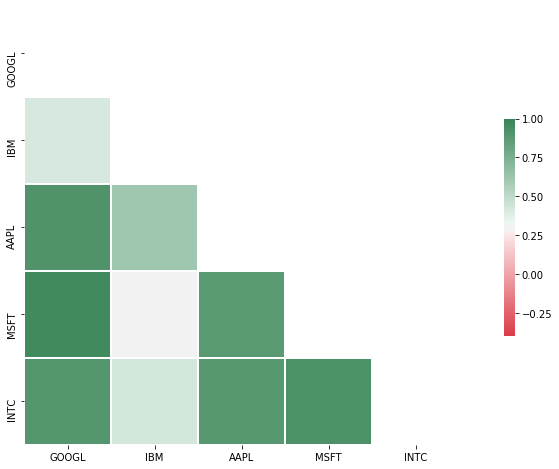

In [215]:
plot_corr_heatmap(stock3.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021147DA40B8>,
      dtype=object)

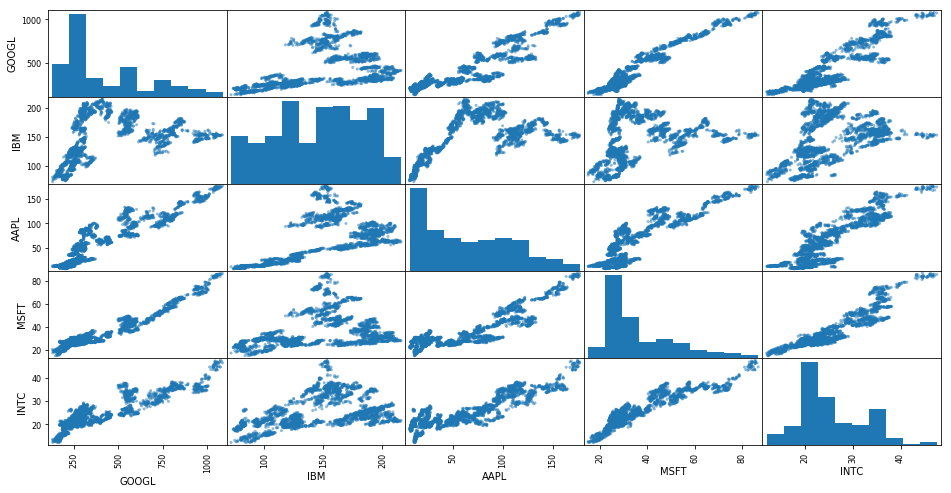

In [221]:
scatter_matrix(stock3)

In [216]:
GOOGL.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.850000  5.211410e+05
25%     247.775000   250.190000   244.035000   247.605000  1.760854e+06
50%     310.480000   312.810000   307.790000   310.080000  2.517630e+06
75%     572.140000   575.975000   565.900000   570.770000  4.242182e+06
max    1083.020000  1086.490000  1072.270000  1085.090000  4.118289e+07

In [217]:
MSFT.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     36.496817    36.827903    36.173190    36.513412  5.161762e+07
std      14.683337    14.742483    14.620057    14.694656  3.114958e+07
min      15.200000    15.620000    14.870000    15.150000  7.425603e+06
25%      26.785000    27.045000    26.535000    26.835000  3.136557e+07
50%      29.990000    30.230000    29.780000    30.000000  4.617529e+07
75%      44.545000    44.980000    44.090000    44.400000  6.322291e+07
max      87.120000    87.500000    86.230000    86.850000  5.910786e+08

In [218]:
AAPL.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     64.673309    65.256833    64.033445    64.662892  1.311457e+08
std      44.524927    44.811772    44.230829    44.536448  1.018560e+08
min       7.390000     7.560000     7.170000     7.240000  1.147592e+07
25%      23.425000    23.805000    23.015000    23.420000  5.292889e+07
50%      57.860000    58.460000    57.320000    57.920000  1.066271e+08
75%      99.165000   100.275000    98.385000    99.480000  1.798977e+08
max     175.110000   177.200000   174.860000   176.420000  8.432640e+08

In [219]:
IBM.describe()

Open         High          Low        Close        Volume
count  3019.000000  3020.000000  3019.000000  3020.000000  3.020000e+03
mean    145.515545   146.681738   144.471597   145.617278  5.773301e+06
std      37.554946    37.613446    37.477641    37.529387  3.192831e+06
min      72.740000    73.940000    69.500000    71.740000  2.542560e+05
25%     116.405000   117.765000   115.490000   116.525000  3.622681e+06
50%     149.610000   150.330000   148.470000   149.315000  4.928852e+06
75%     178.445000   179.762500   177.330000   178.685000  6.965014e+06
max     215.380000   215.900000   214.300000   215.800000  3.077428e+07

In [220]:
INTC.describe()

Open         High          Low       Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.00000  3.019000e+03
mean     25.396744    25.659096    25.142136    25.40789  4.919834e+07
std       6.715544     6.728572     6.700110     6.72870  2.817910e+07
min      12.170000    12.630000    12.050000    12.08000  5.893789e+06
25%      20.645000    20.880000    20.415000    20.66000  2.736445e+07
50%      23.600000    23.860000    23.320000    23.58000  4.519099e+07
75%      30.810000    31.105000    30.500000    30.85500  6.363350e+07
max      47.540000    47.640000    46.660000    47.56000  3.100734e+08

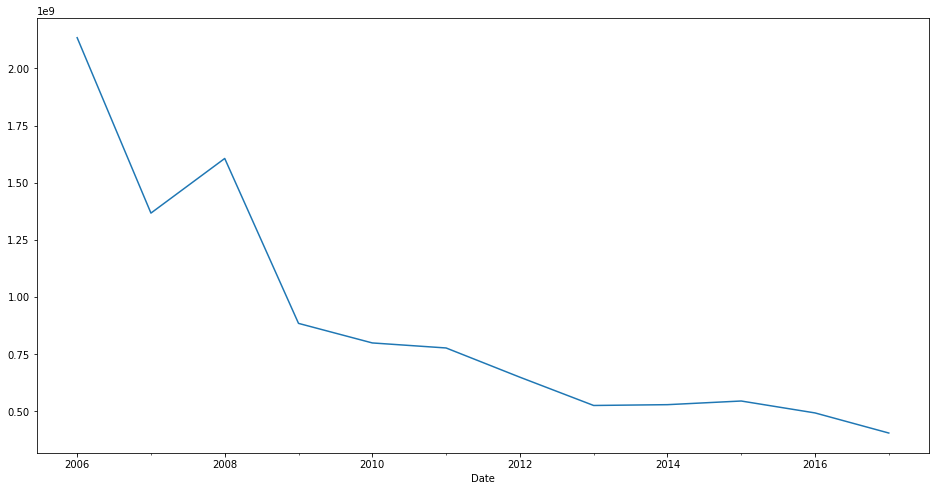

In [83]:
GOOGL_Vol = GOOGL['Volume'].resample('1Y').sum()
GOOGL_Vol.plot()

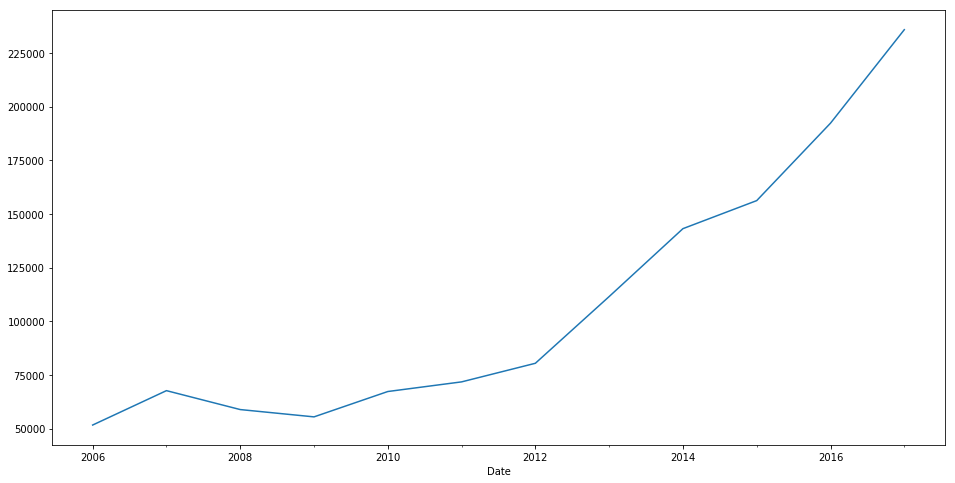

In [84]:
GOOGL_Close = GOOGL['Close'].resample('1Y').sum()
GOOGL_Close.plot()

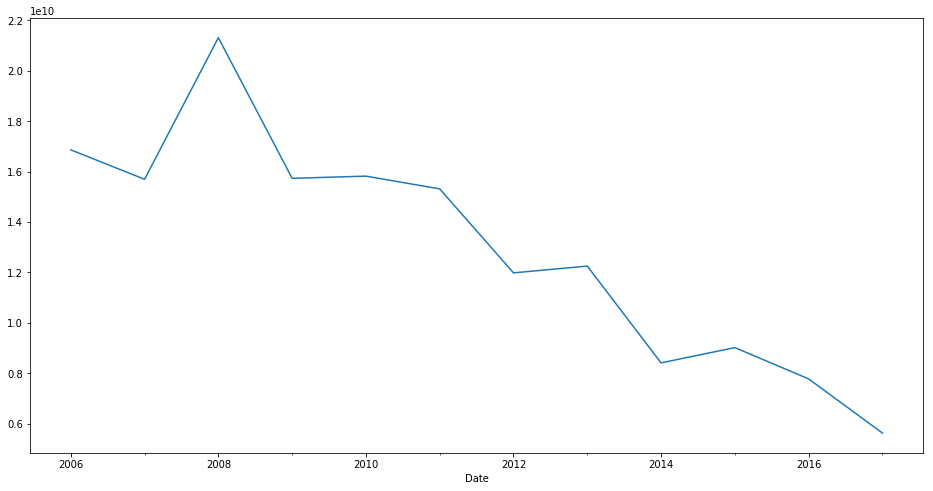

In [85]:
MSFT_Vol = MSFT['Volume'].resample('1Y').sum()
MSFT_Vol.plot()

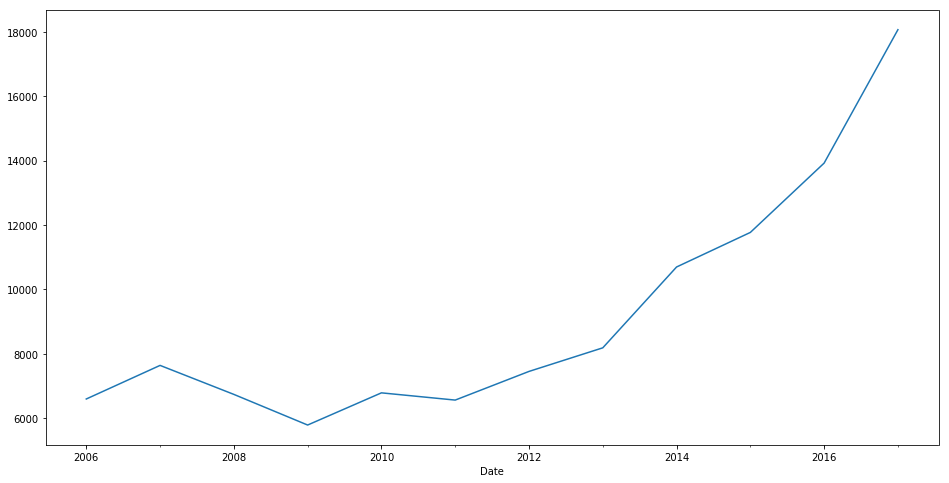

In [86]:
MSFT_Close = MSFT['Close'].resample('1Y').sum()
MSFT_Close.plot()

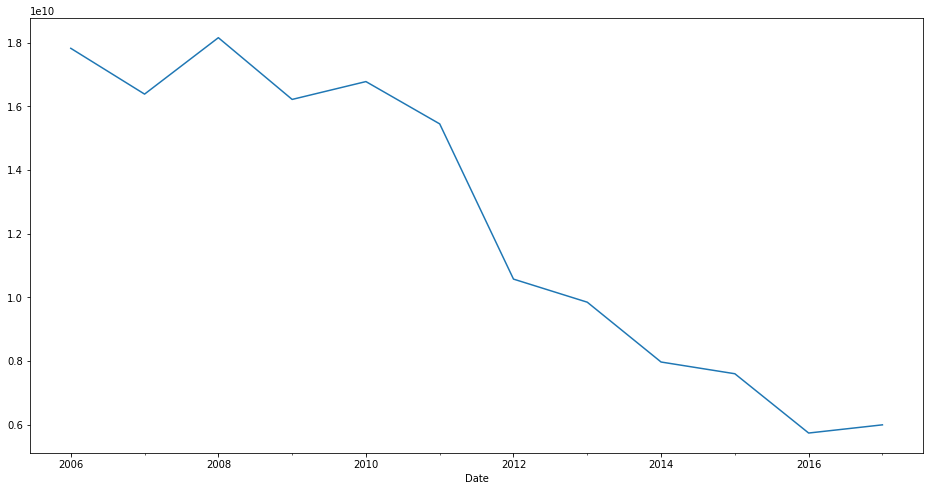

In [87]:
INTC_Vol = INTC['Volume'].resample('1Y').sum()
INTC_Vol.plot()

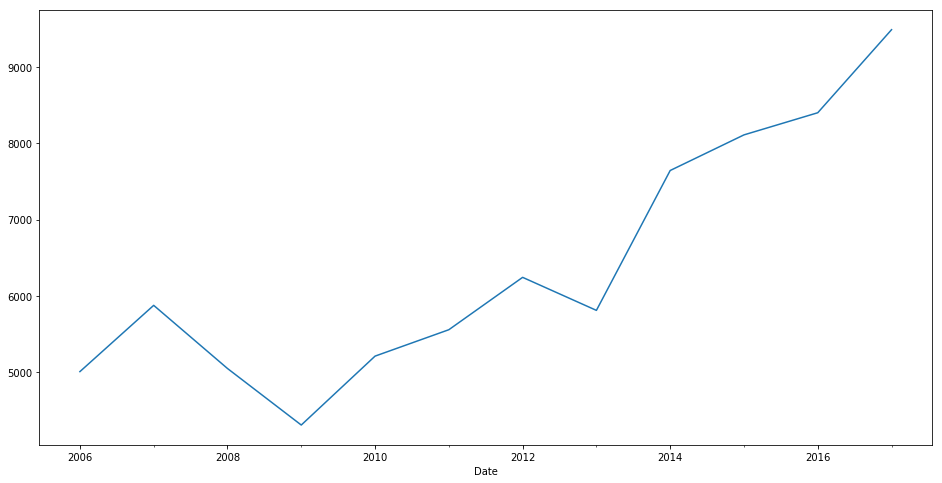

In [90]:
INTC_Close = INTC['Close'].resample('1Y').sum()
INTC_Close.plot()

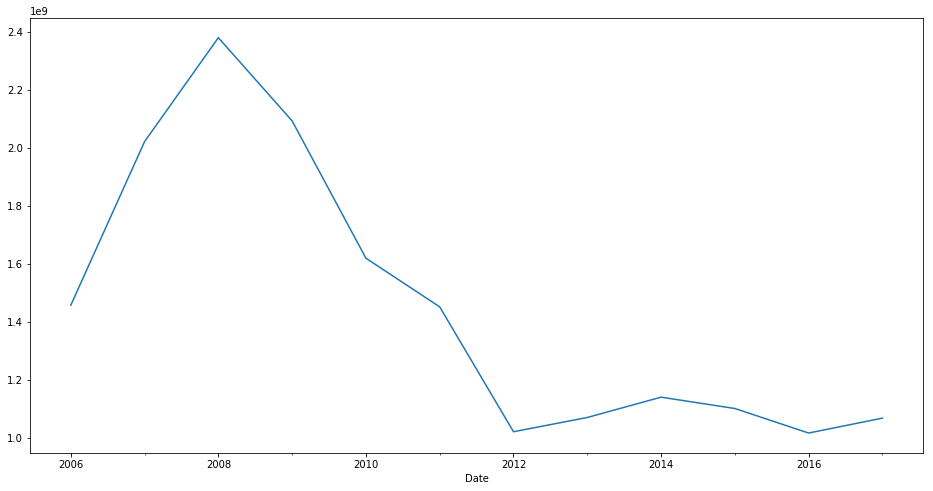

In [88]:
IBM_Vol = IBM['Volume'].resample('1Y').sum()
IBM_Vol.plot()

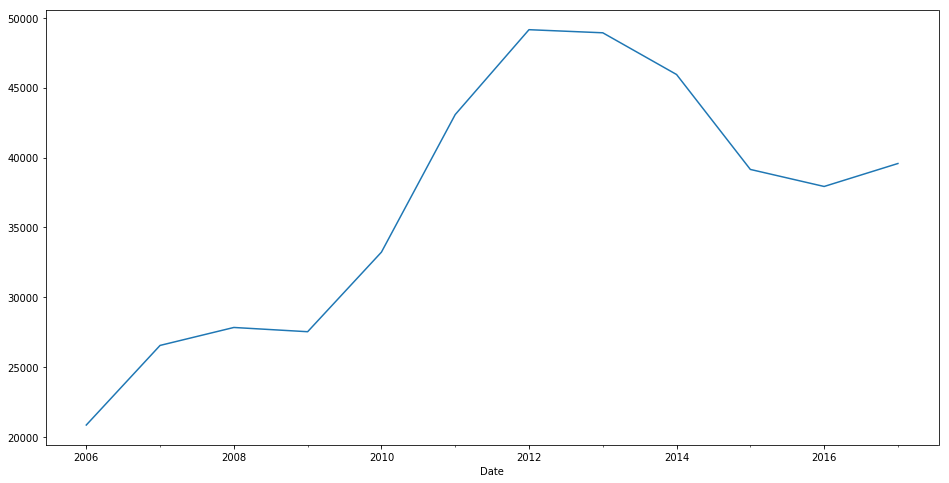

In [91]:
IBM_Close = IBM['Close'].resample('1Y').sum()
IBM_Close.plot()

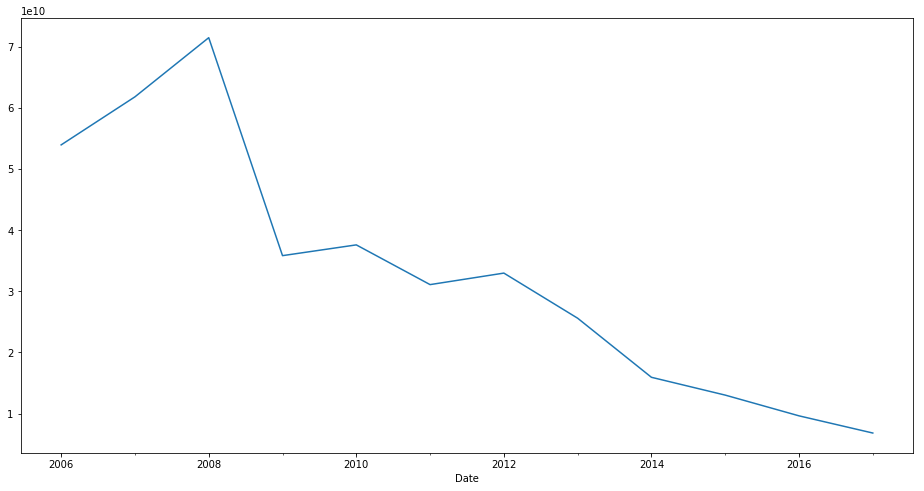

In [89]:
AAPL_Vol = AAPL['Volume'].resample('1Y').sum()
AAPL_Vol.plot()

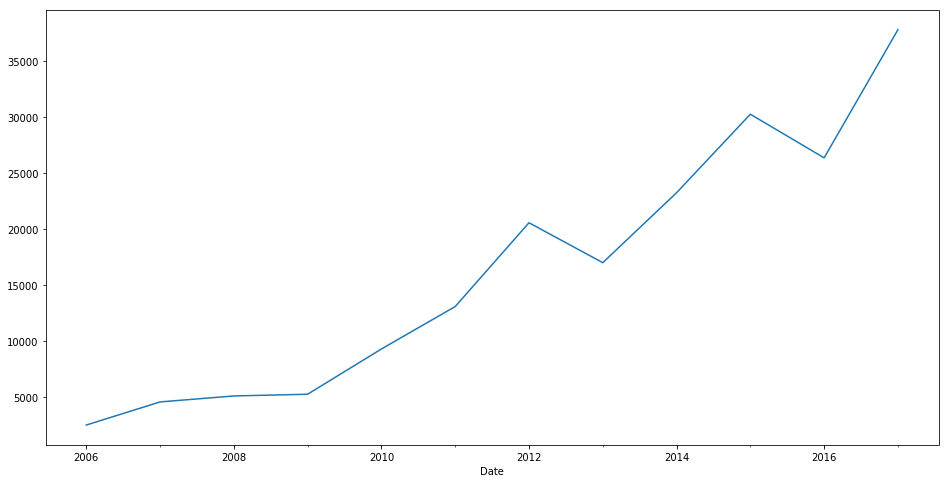

In [92]:
AAPL_Close = AAPL['Close'].resample('1Y').sum()
AAPL_Close.plot()

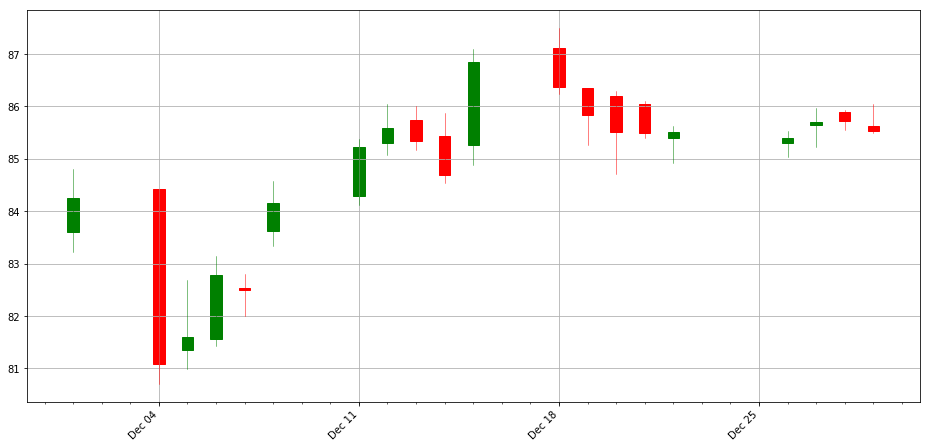

In [93]:
plot_candlestick_ohlc(MSFT[(pd.DatetimeIndex(pd.to_datetime(MSFT.reset_index()['Date'])).month==12)&(pd.DatetimeIndex(pd.to_datetime(MSFT.reset_index()['Date'])).year==2017)],stick='day')

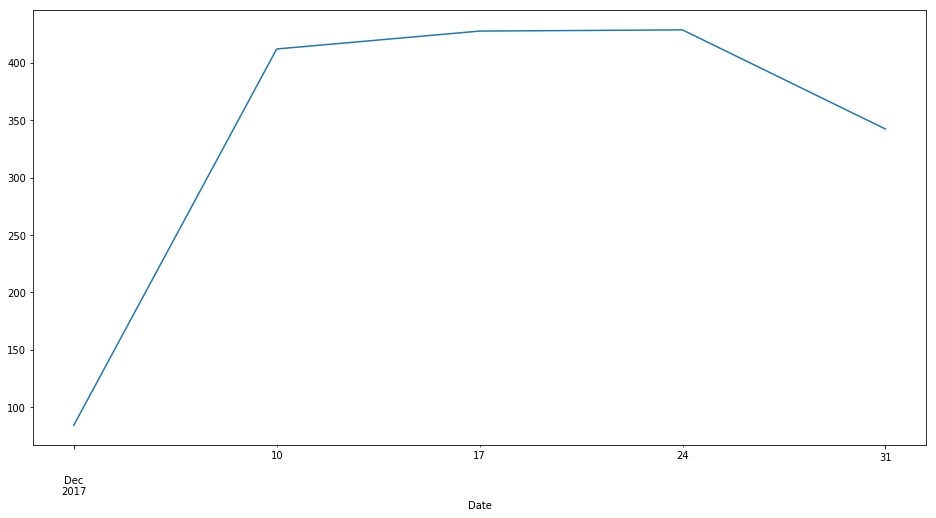

In [94]:
MSFT_Close = MSFT[(pd.DatetimeIndex(pd.to_datetime(MSFT.reset_index()['Date'])).month==12)&(pd.DatetimeIndex(pd.to_datetime(MSFT.reset_index()['Date'])).year==2017)]['Close'].resample('1W').sum()
MSFT_Close.plot()

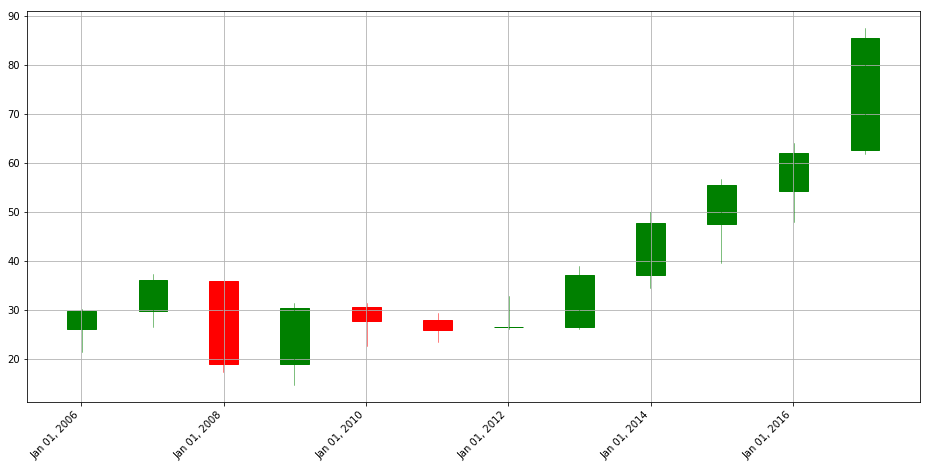

In [95]:
plot_candlestick_ohlc(MSFT,stick="year")

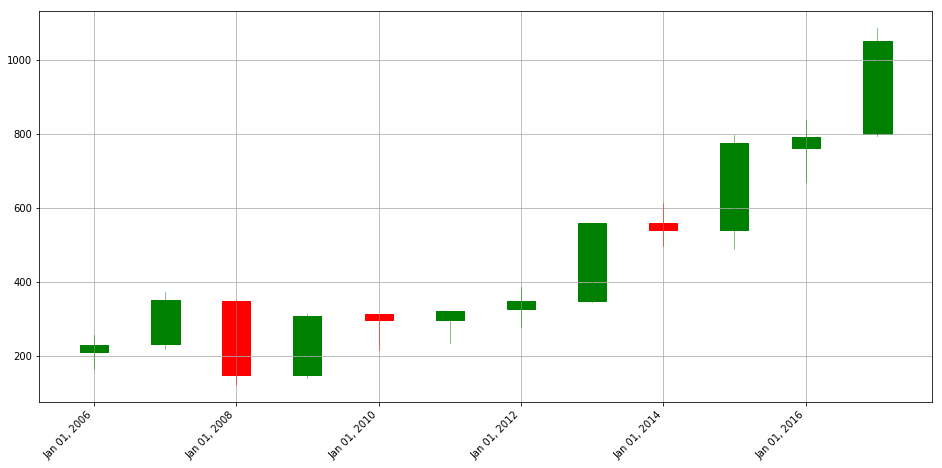

In [96]:
plot_candlestick_ohlc(GOOGL,stick="year")

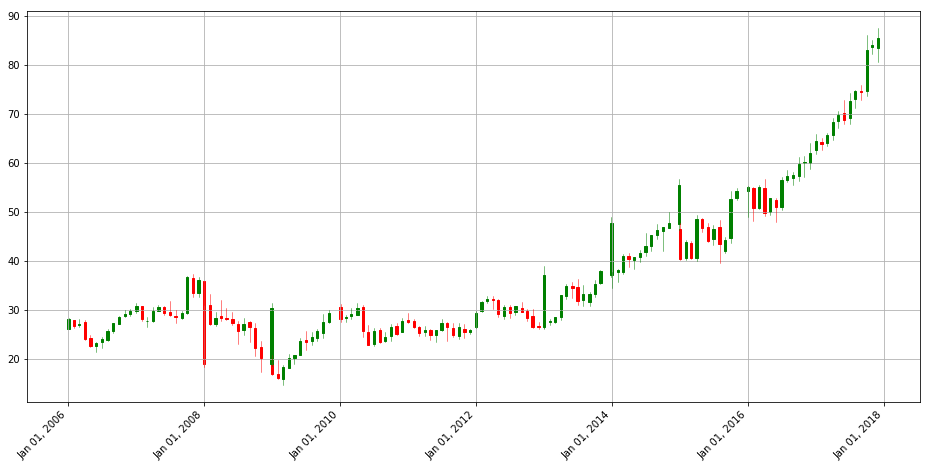

In [97]:
plot_candlestick_ohlc(MSFT,stick="month")

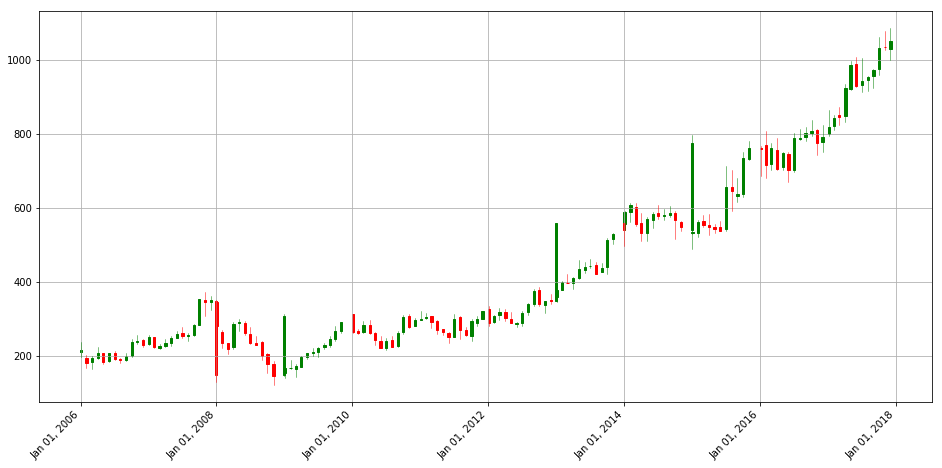

In [98]:
plot_candlestick_ohlc(GOOGL,stick="month")

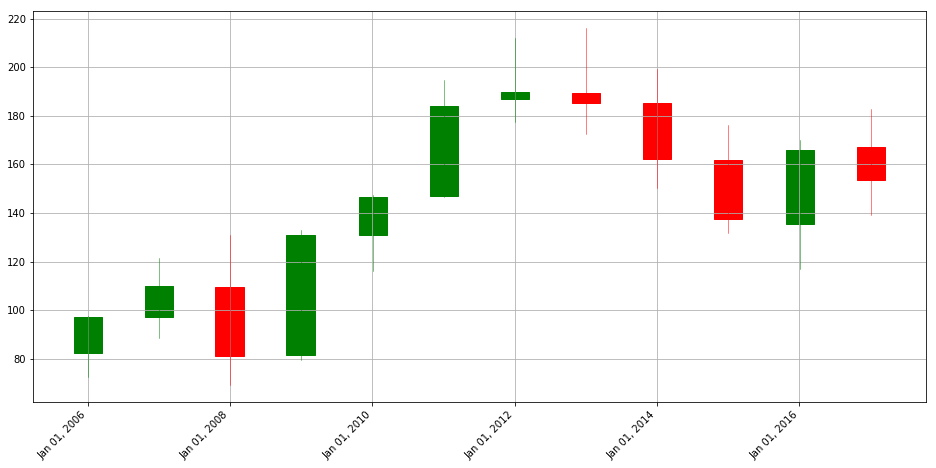

In [99]:
plot_candlestick_ohlc(IBM,stick="year")

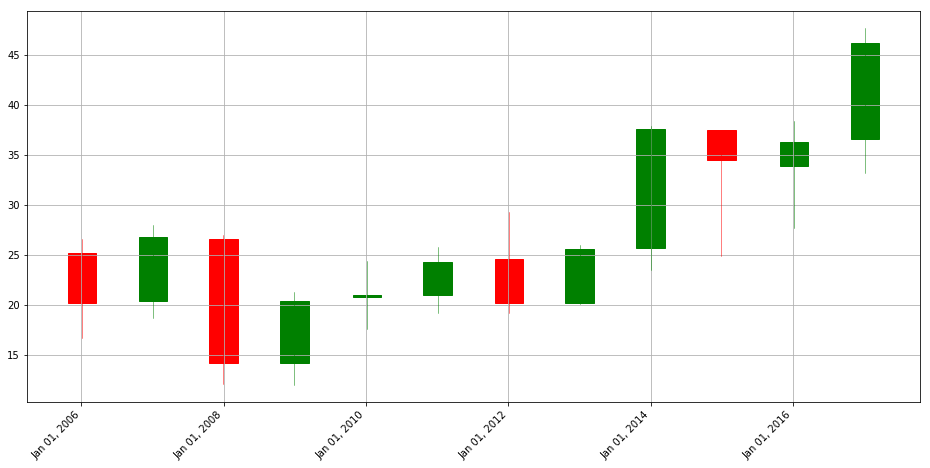

In [100]:
plot_candlestick_ohlc(INTC,stick="year")

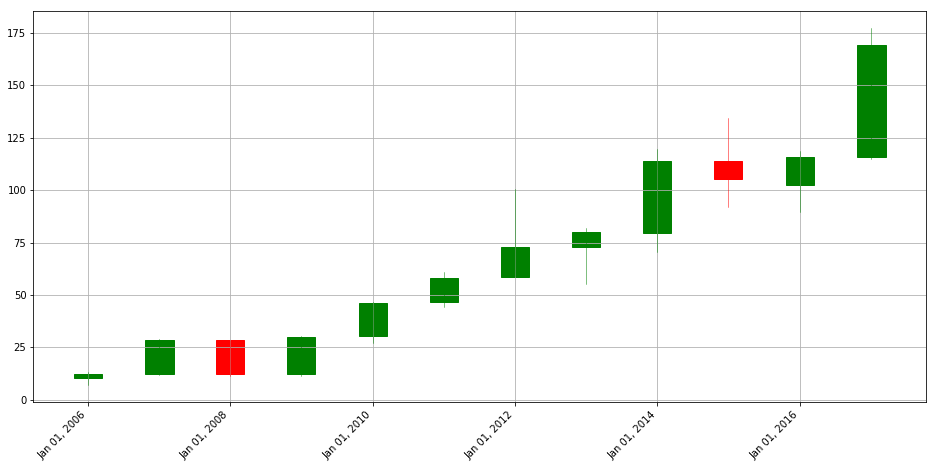

In [101]:
plot_candlestick_ohlc(AAPL,stick="year")

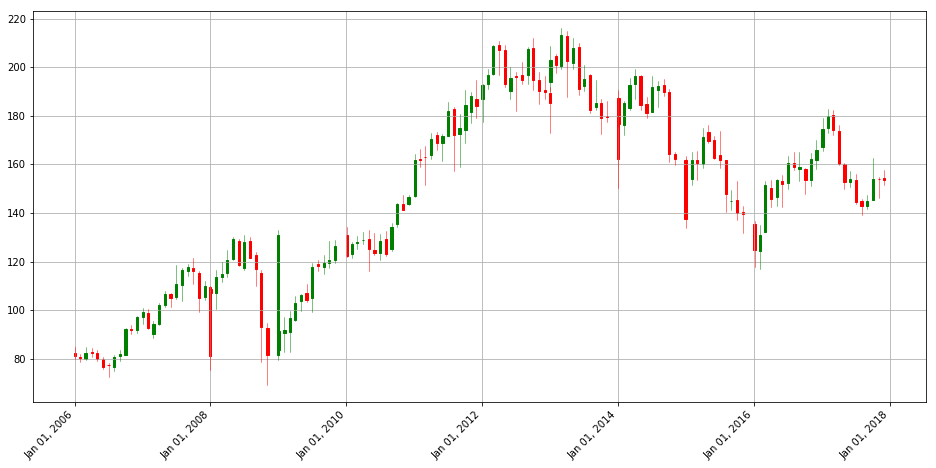

In [102]:
plot_candlestick_ohlc(IBM,stick="month")

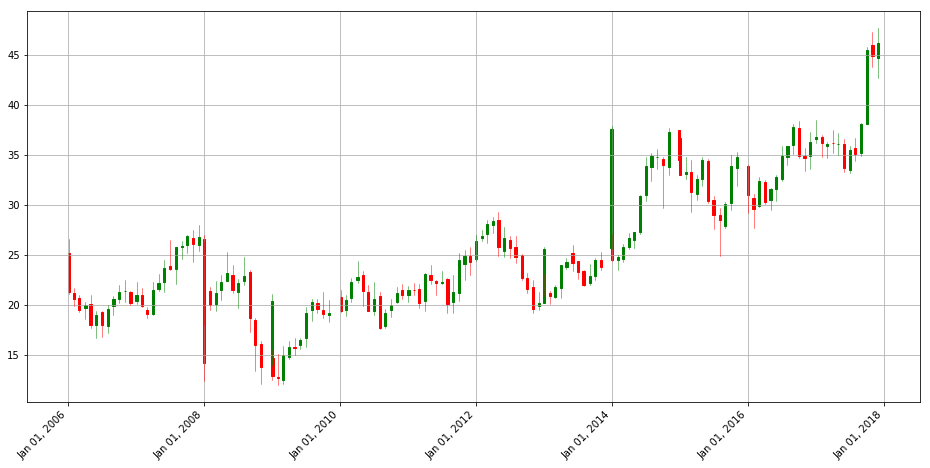

In [103]:
plot_candlestick_ohlc(INTC,stick="month")

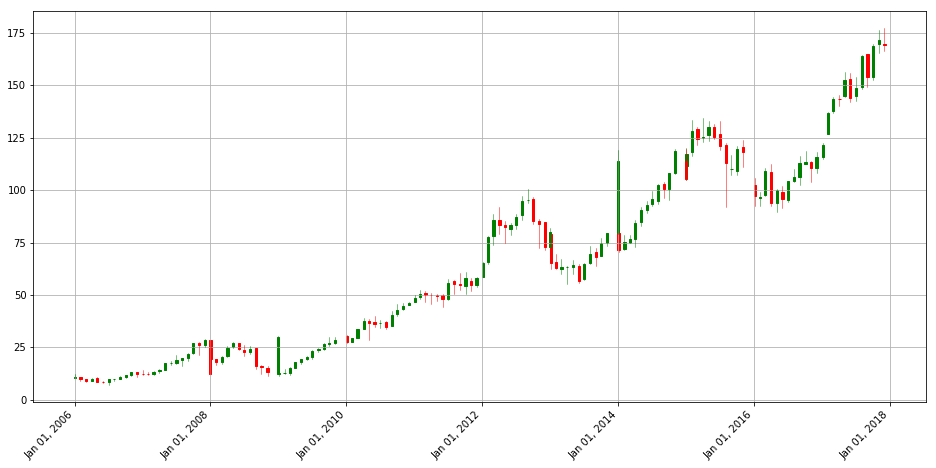

In [104]:
plot_candlestick_ohlc(AAPL,stick="month")

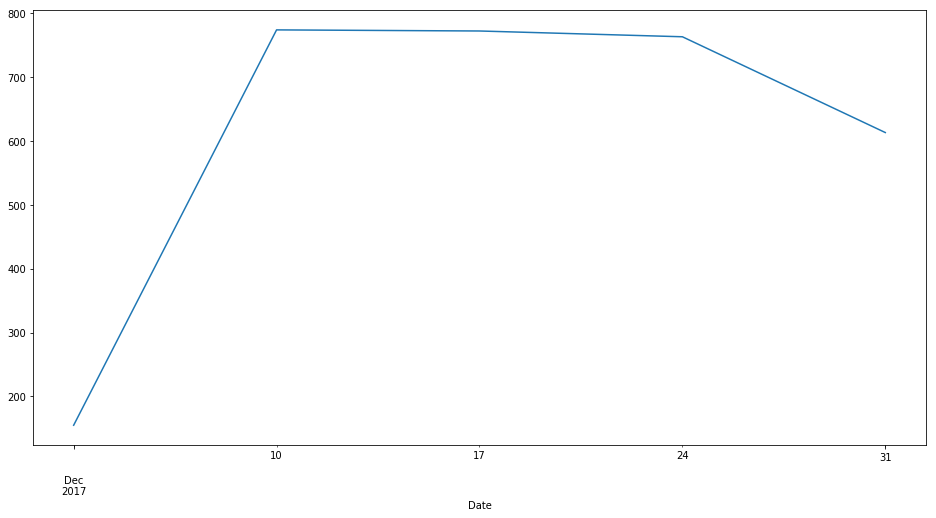

In [105]:
IBM_Close = IBM[(pd.DatetimeIndex(pd.to_datetime(IBM.reset_index()['Date'])).month==12)&(pd.DatetimeIndex(pd.to_datetime(IBM.reset_index()['Date'])).year==2017)]['Close'].resample('1W').sum()
IBM_Close.plot()

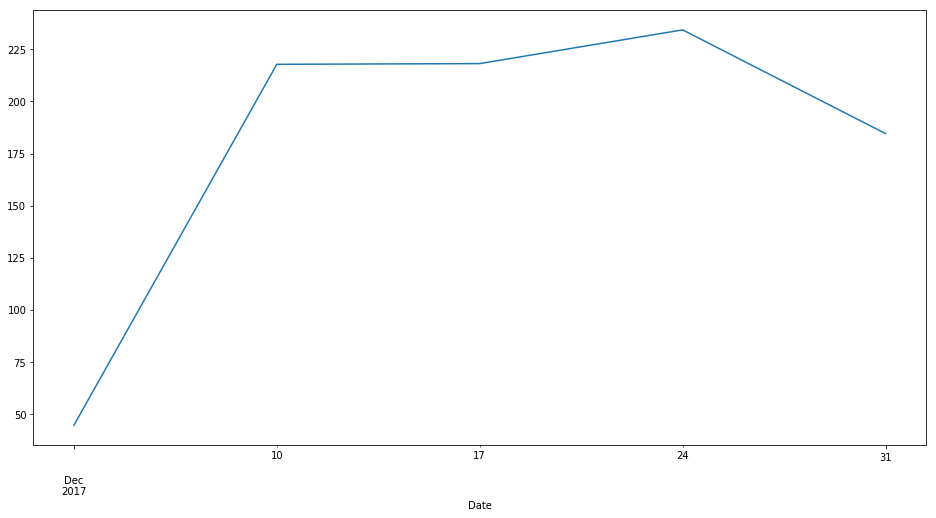

In [106]:
INTC_Close = INTC[(pd.DatetimeIndex(pd.to_datetime(INTC.reset_index()['Date'])).month==12)&(pd.DatetimeIndex(pd.to_datetime(INTC.reset_index()['Date'])).year==2017)]['Close'].resample('1W').sum()
INTC_Close.plot()

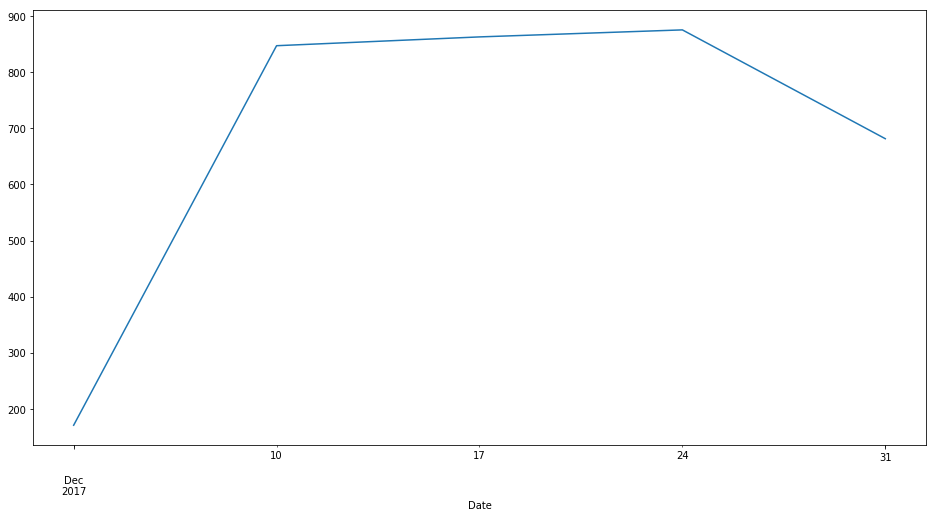

In [107]:
AAPL_Close = AAPL[(pd.DatetimeIndex(pd.to_datetime(AAPL.reset_index()['Date'])).month==12)&(pd.DatetimeIndex(pd.to_datetime(AAPL.reset_index()['Date'])).year==2017)]['Close'].resample('1W').sum()
AAPL_Close.plot()

###### Stock Return

In [108]:
stocks = pd.DataFrame({"AAPL": AAPL["Close"],
                      "MSFT": MSFT["Close"],
                      "GOOGL": GOOGL["Close"],
                      "IBM": IBM["Close"],
                      "INTC": INTC["Close"]})
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1


AAPL      MSFT     GOOGL       IBM      INTC
Date                                                        
2006-01-03  0.000000  0.000000  0.000000  0.000000  0.000000
2006-01-04  0.002809  0.004844  0.023000 -0.001340  0.013297
2006-01-05 -0.004682  0.005589  0.036818  0.005362  0.027376
2006-01-06  0.020599  0.002608  0.069917  0.035218  0.028940
2006-01-09  0.016854  0.000745  0.072763  0.020351  0.035197

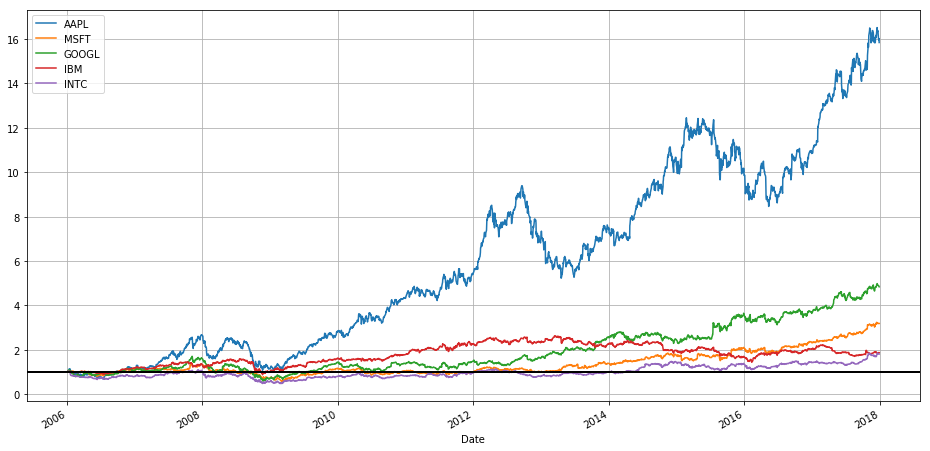

In [109]:
stock_return.plot(grid = True,figsize=(16,8)).axhline(y = 1, color = "black", lw = 2)

###### percentage change in a stock price

###### IT Companies

In [110]:
stock_perc_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_perc_change.head()

AAPL      MSFT     GOOGL       IBM      INTC
Date                                                        
2006-01-03       NaN       NaN       NaN       NaN       NaN
2006-01-04  0.002805  0.004832  0.022739 -0.001341  0.013209
2006-01-05 -0.007498  0.000741  0.013417  0.006689  0.013799
2006-01-06  0.025083 -0.002968  0.031425  0.029265  0.001521
2006-01-09 -0.003676 -0.001860  0.002657 -0.014466  0.006063

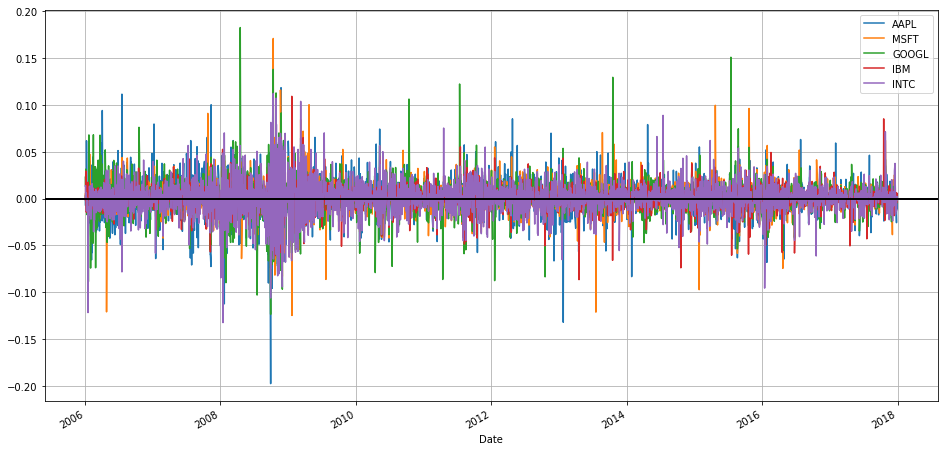

In [111]:
stock_perc_change.plot(grid = True,figsize=(16,8)).axhline(y = 0, color = "black", lw = 2)

###### Simple Moving Average(SMA)- A q-day moving average is, for a series x_t and a point in time t, the average of the past q days

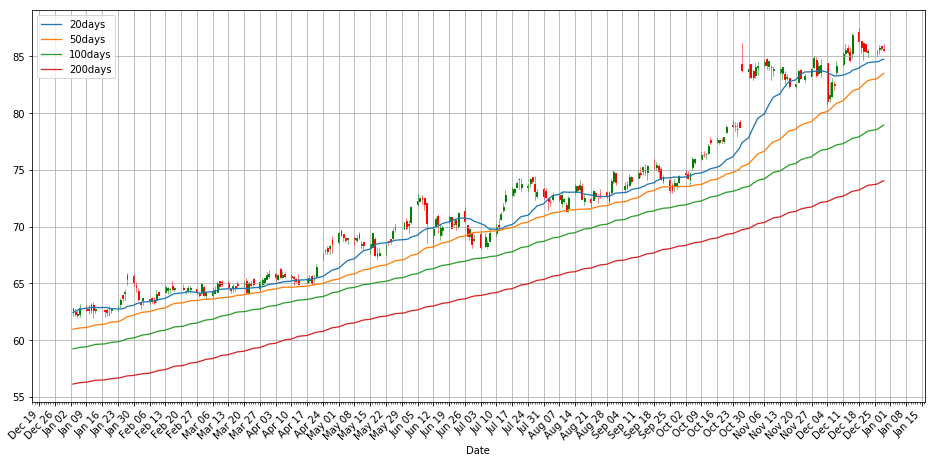

In [112]:
MSFT["20days"] = np.round(MSFT["Close"].rolling(window = 20, center = False).mean(), 2)
MSFT["50days"] = np.round(MSFT["Close"].rolling(window = 50, center = False).mean(), 2)
MSFT["100days"] = np.round(MSFT["Close"].rolling(window = 100, center = False).mean(), 2)
MSFT["200days"] = np.round(MSFT["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(MSFT.loc['2017-01-01':'2017-12-31',:], otherseries = ["20days","50days","100days","200days"])

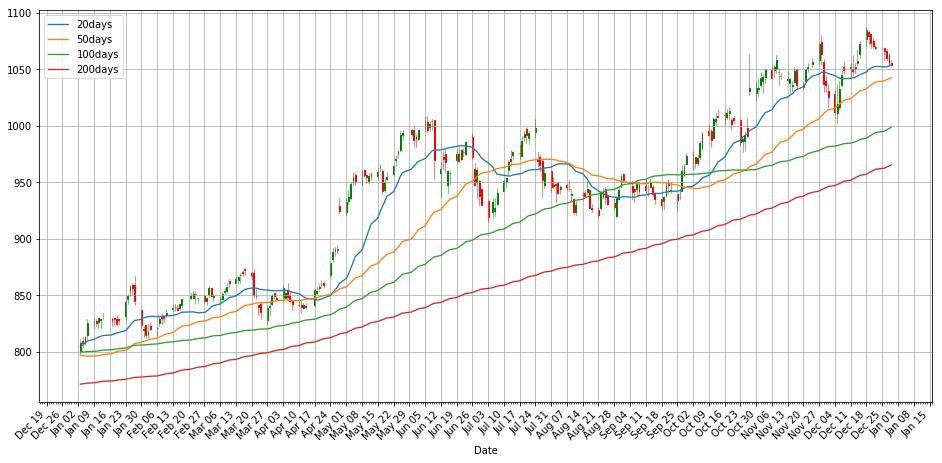

In [113]:
GOOGL["20days"] = np.round(GOOGL["Close"].rolling(window = 20, center = False).mean(), 2)
GOOGL["50days"] = np.round(GOOGL["Close"].rolling(window = 50, center = False).mean(), 2)
GOOGL["100days"] = np.round(GOOGL["Close"].rolling(window = 100, center = False).mean(), 2)
GOOGL["200days"] = np.round(GOOGL["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(GOOGL.loc['2017-01-01':'2017-12-31',:], otherseries = ["20days","50days","100days","200days"])

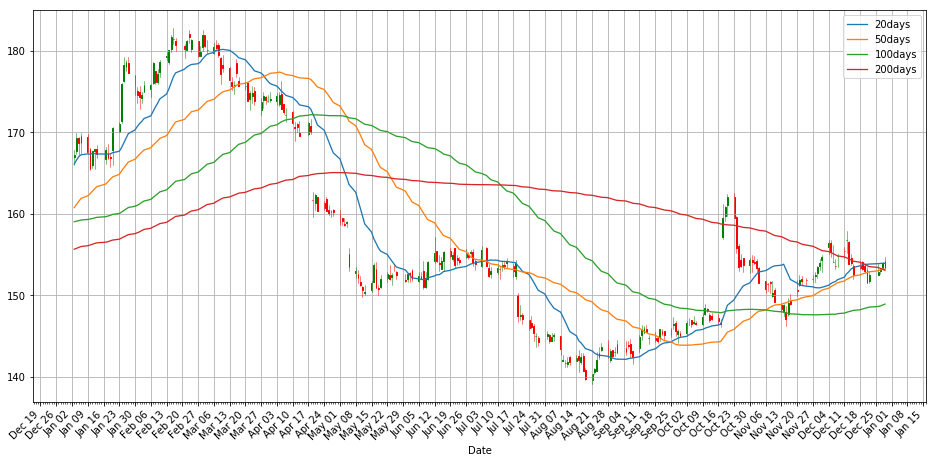

In [114]:
IBM["20days"] = np.round(IBM["Close"].rolling(window = 20, center = False).mean(), 2)
IBM["50days"] = np.round(IBM["Close"].rolling(window = 50, center = False).mean(), 2)
IBM["100days"] = np.round(IBM["Close"].rolling(window = 100, center = False).mean(), 2)
IBM["200days"] = np.round(IBM["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(IBM.loc['2017-01-01':'2017-12-31',:], otherseries = ["20days","50days","100days","200days"])

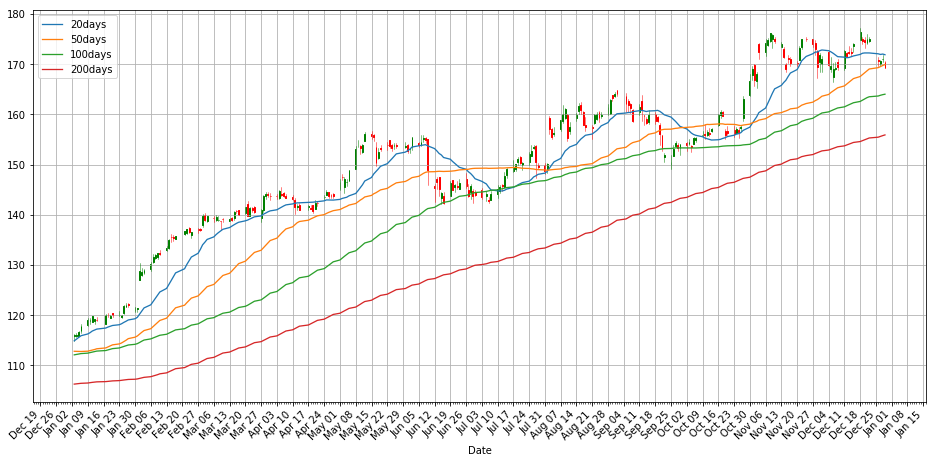

In [115]:
AAPL["20days"] = np.round(AAPL["Close"].rolling(window = 20, center = False).mean(), 2)
AAPL["50days"] = np.round(AAPL["Close"].rolling(window = 50, center = False).mean(), 2)
AAPL["100days"] = np.round(AAPL["Close"].rolling(window = 100, center = False).mean(), 2)
AAPL["200days"] = np.round(AAPL["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(AAPL.loc['2017-01-01':'2017-12-31',:], otherseries = ["20days","50days","100days","200days"])

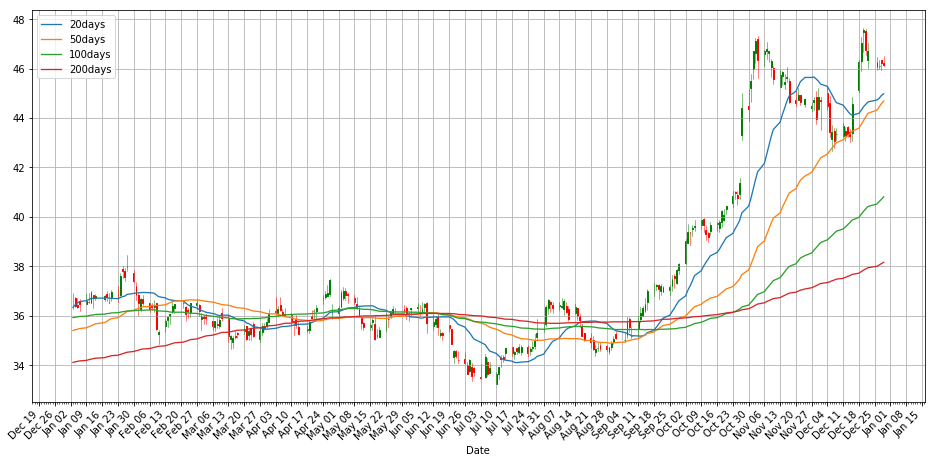

In [116]:
INTC["20days"] = np.round(INTC["Close"].rolling(window = 20, center = False).mean(), 2)
INTC["50days"] = np.round(INTC["Close"].rolling(window = 50, center = False).mean(), 2)
INTC["100days"] = np.round(INTC["Close"].rolling(window = 100, center = False).mean(), 2)
INTC["200days"] = np.round(INTC["Close"].rolling(window = 200, center = False).mean(), 2)
plot_candlestick_ohlc(INTC.loc['2017-01-01':'2017-12-31',:], otherseries = ["20days","50days","100days","200days"])

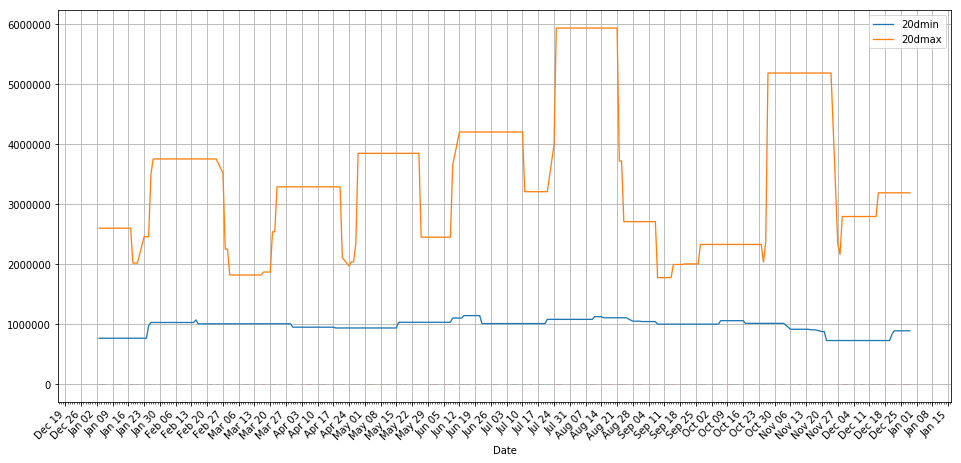

In [117]:
GOOGL["20dmin"] = np.round(GOOGL["Volume"].rolling(window = 20, center = False).min(), 2)
GOOGL["20dmax"] = np.round(GOOGL["Volume"].rolling(window = 20, center = False).max(), 2)
plot_candlestick_ohlc(GOOGL.loc['2017-01-01':'2017-12-31',:], otherseries = ["20dmin","20dmax"])

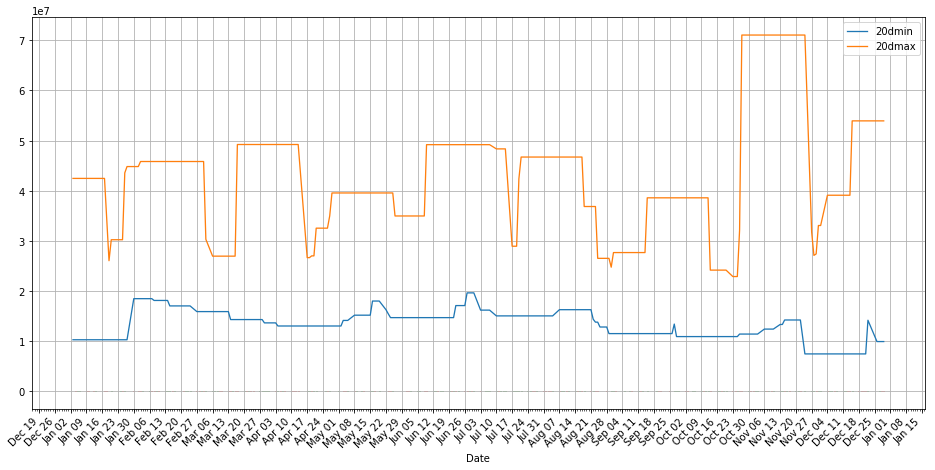

In [118]:
MSFT["20dmin"] = np.round(MSFT["Volume"].rolling(window = 20, center = False).min(), 2)
MSFT["20dmax"] = np.round(MSFT["Volume"].rolling(window = 20, center = False).max(), 2)
plot_candlestick_ohlc(MSFT.loc['2017-01-01':'2017-12-31',:], otherseries = ["20dmin","20dmax"])

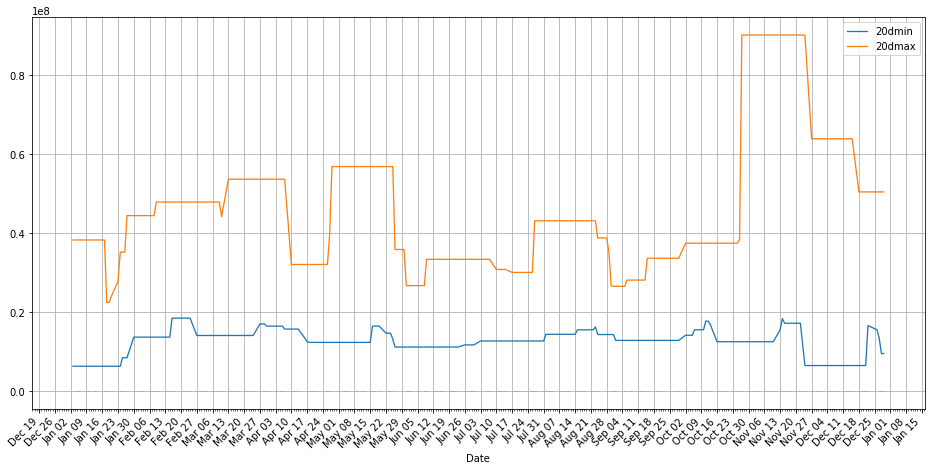

In [119]:
INTC["20dmin"] = np.round(INTC["Volume"].rolling(window = 20, center = False).min(), 2)
INTC["20dmax"] = np.round(INTC["Volume"].rolling(window = 20, center = False).max(), 2)
plot_candlestick_ohlc(INTC.loc['2017-01-01':'2017-12-31',:], otherseries = ["20dmin","20dmax"])

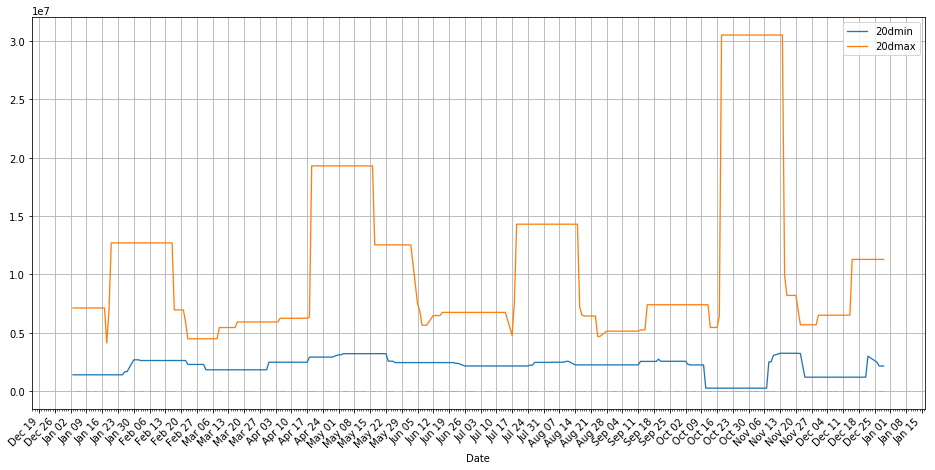

In [120]:
IBM["20dmin"] = np.round(IBM["Volume"].rolling(window = 20, center = False).min(), 2)
IBM["20dmax"] = np.round(IBM["Volume"].rolling(window = 20, center = False).max(), 2)
plot_candlestick_ohlc(IBM.loc['2017-01-01':'2017-12-31',:], otherseries = ["20dmin","20dmax"])

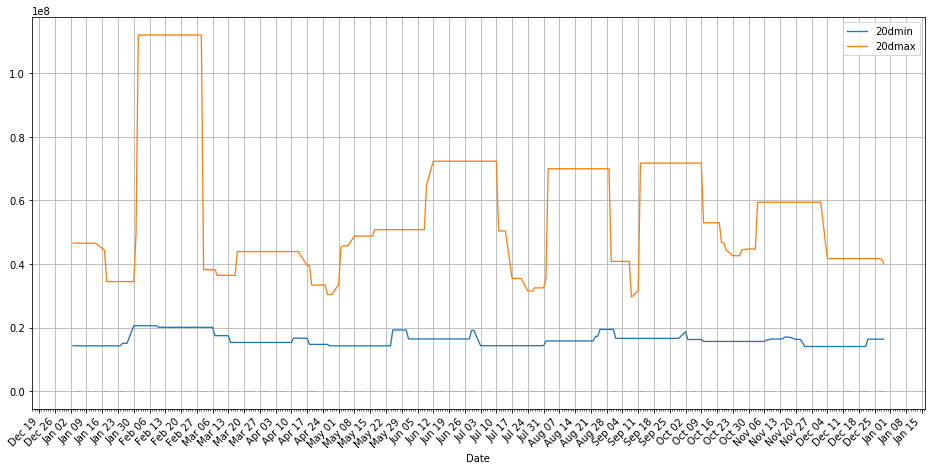

In [121]:
AAPL["20dmin"] = np.round(AAPL["Volume"].rolling(window = 20, center = False).min(), 2)
AAPL["20dmax"] = np.round(AAPL["Volume"].rolling(window = 20, center = False).max(), 2)
plot_candlestick_ohlc(AAPL.loc['2017-01-01':'2017-12-31',:], otherseries = ["20dmin","20dmax"])

###### Exponential Moving Average

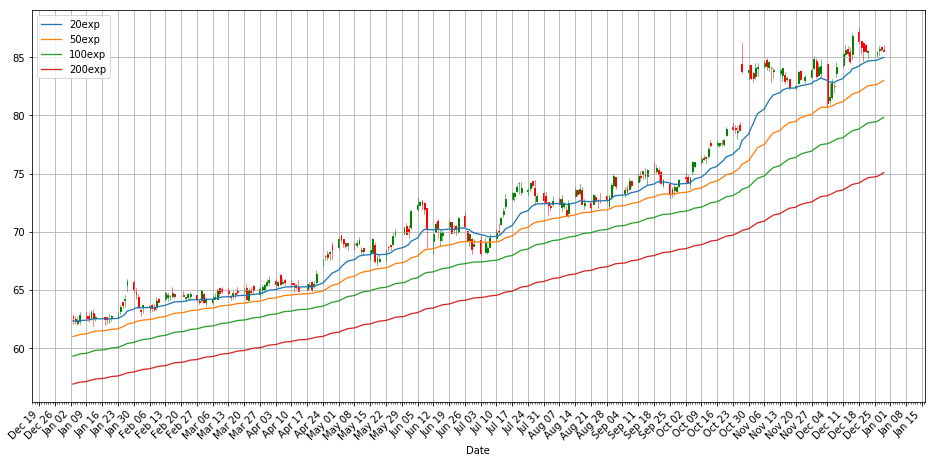

In [125]:
MSFT["20exp"]=np.round(MSFT['Close'].ewm( span = 20, min_periods = 20 - 1).mean(),2)
MSFT["50exp"]=np.round(MSFT['Close'].ewm( span = 50, min_periods = 50 - 1).mean(),2)
MSFT["100exp"]=np.round(MSFT['Close'].ewm( span = 100, min_periods = 100 - 1).mean(),2)
MSFT["200exp"]=np.round(MSFT['Close'].ewm( span = 200, min_periods = 200 - 1).mean(),2)
plot_candlestick_ohlc(MSFT.loc['2017-01-01':'2017-12-31',:], otherseries = ["20exp","50exp","100exp","200exp"])

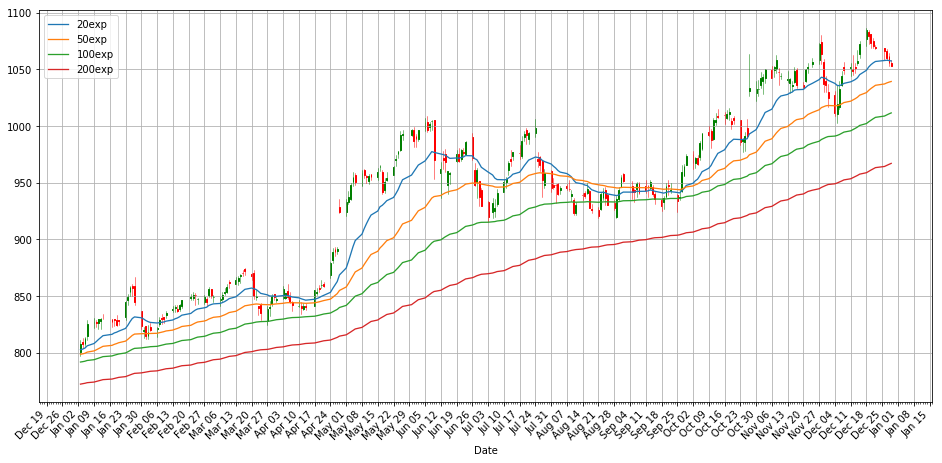

In [126]:
GOOGL["20exp"]=np.round(GOOGL['Close'].ewm( span = 20, min_periods = 20 - 1).mean(),2)
GOOGL["50exp"]=np.round(GOOGL['Close'].ewm( span = 50, min_periods = 50 - 1).mean(),2)
GOOGL["100exp"]=np.round(GOOGL['Close'].ewm( span = 100, min_periods = 100 - 1).mean(),2)
GOOGL["200exp"]=np.round(GOOGL['Close'].ewm( span = 200, min_periods = 200 - 1).mean(),2)
plot_candlestick_ohlc(GOOGL.loc['2017-01-01':'2017-12-31',:], otherseries = ["20exp","50exp","100exp","200exp"])

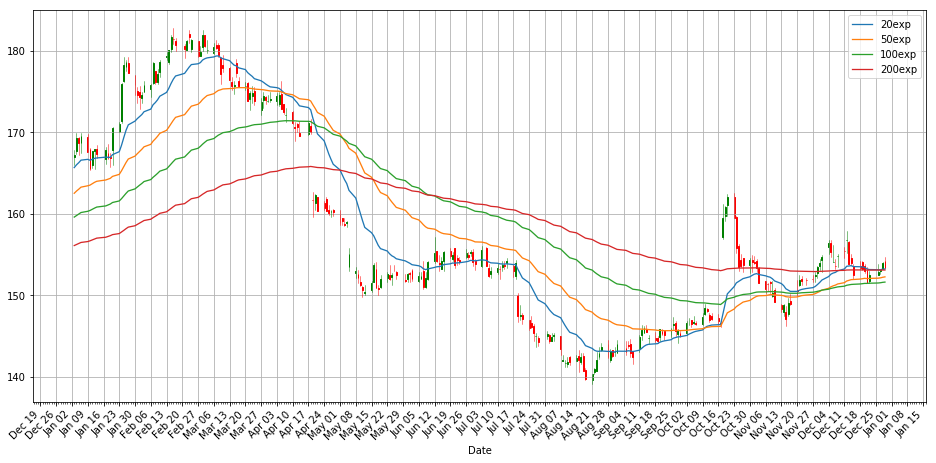

In [127]:
IBM["20exp"]=np.round(IBM['Close'].ewm( span = 20, min_periods = 20 - 1).mean(),2)
IBM["50exp"]=np.round(IBM['Close'].ewm( span = 50, min_periods = 50 - 1).mean(),2)
IBM["100exp"]=np.round(IBM['Close'].ewm( span = 100, min_periods = 100 - 1).mean(),2)
IBM["200exp"]=np.round(IBM['Close'].ewm( span = 200, min_periods = 200 - 1).mean(),2)
plot_candlestick_ohlc(IBM.loc['2017-01-01':'2017-12-31',:], otherseries = ["20exp","50exp","100exp","200exp"])

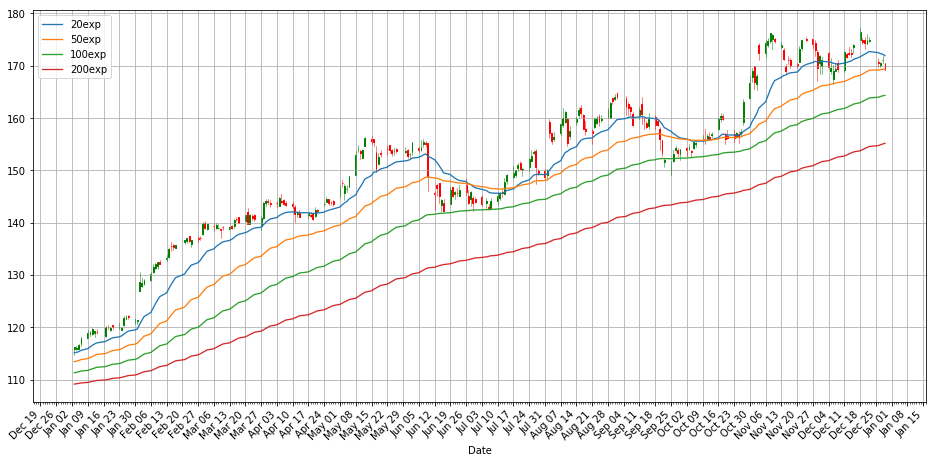

In [128]:
AAPL["20exp"]=np.round(AAPL['Close'].ewm( span = 20, min_periods = 20 - 1).mean(),2)
AAPL["50exp"]=np.round(AAPL['Close'].ewm( span = 50, min_periods = 50 - 1).mean(),2)
AAPL["100exp"]=np.round(AAPL['Close'].ewm( span = 100, min_periods = 100 - 1).mean(),2)
AAPL["200exp"]=np.round(AAPL['Close'].ewm( span = 200, min_periods = 200 - 1).mean(),2)
plot_candlestick_ohlc(AAPL.loc['2017-01-01':'2017-12-31',:], otherseries = ["20exp","50exp","100exp","200exp"])

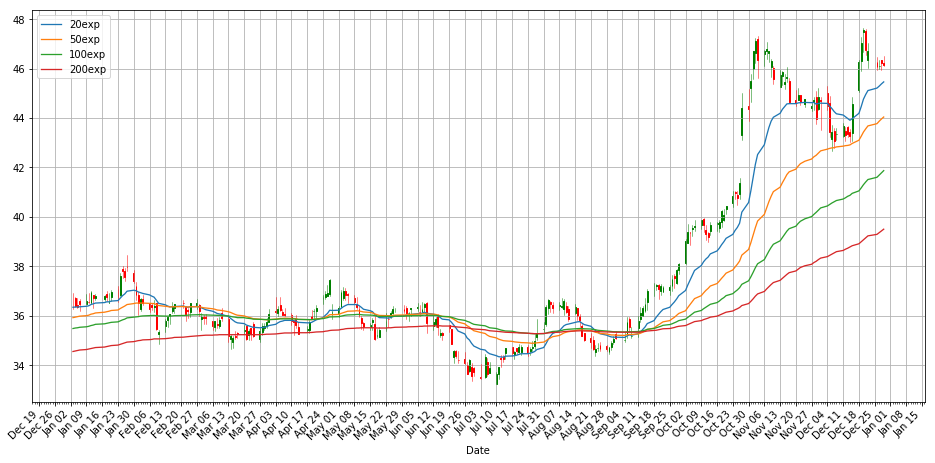

In [129]:
INTC["20exp"]=np.round(INTC['Close'].ewm( span = 20, min_periods = 20 - 1).mean(),2)
INTC["50exp"]=np.round(INTC['Close'].ewm( span = 50, min_periods = 50 - 1).mean(),2)
INTC["100exp"]=np.round(INTC['Close'].ewm( span = 100, min_periods = 100 - 1).mean(),2)
INTC["200exp"]=np.round(INTC['Close'].ewm( span = 200, min_periods = 200 - 1).mean(),2)
plot_candlestick_ohlc(INTC.loc['2017-01-01':'2017-12-31',:], otherseries = ["20exp","50exp","100exp","200exp"])